<img src="https://cdn.dealmango.com/wp-content/uploads/2023/08/adease-lifetime-deal-on-dealmirror.jpg" width="1200" height="400">

## About AdEase 🅰️

Ad Ease is an ads and marketing based company helping businesses elicit maximum clicks @ minimum cost. AdEase is an ad infrastructure to help businesses promote themselves easily, effectively, and economically. The interplay of 3 AI modules - Design, Dispense, and Decipher, come together to make it this an end-to-end 3 step process digital advertising solution for all.

## Business Problem 💡

The primary objective is to accurately forecast the number of views for each Wikipedia page to optimize ad placement strategies. By predicting future page views, Ad Ease can ensure that ads are placed on pages with high traffic, thereby maximizing visibility and engagement for their clients.

- - - -
## Importing Required Libraries 🤝

In [1]:
import pandas as pd
import numpy as np
import itertools

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae,
    mean_absolute_percentage_error as mape
)

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

import warnings
warnings.filterwarnings('ignore')

c:\Users\ganelnu\AppData\Local\miniconda3\envs\learnings\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


- - - -
## Read Dataset 🔍

In [2]:
df = pd.read_csv('../data/train_1.csv')

In [3]:
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [4]:
df.shape

(145063, 551)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
2015-07-01,124323.0,1195.856567,72753.518671,0.0,13.0,109.0,524.0,20381245.0
2015-07-02,124247.0,1204.003638,74215.145424,0.0,13.0,108.0,519.0,20752194.0
2015-07-03,124519.0,1133.675969,69610.224744,0.0,12.0,105.0,504.0,19573967.0
2015-07-04,124409.0,1170.437324,72573.513699,0.0,13.0,105.0,487.0,20439645.0
2015-07-05,124404.0,1217.769300,73796.116656,0.0,14.0,113.0,540.0,20772109.0
...,...,...,...,...,...,...,...,...
2016-12-27,141362.0,1678.301870,92324.820056,0.0,23.0,162.0,668.0,26916991.0
2016-12-28,141241.0,1633.965605,91858.307668,0.0,24.0,163.0,654.0,27025053.0
2016-12-29,141237.0,1684.307717,90142.656814,0.0,23.0,160.0,649.0,26073819.0
2016-12-30,141428.0,1467.943378,81554.814146,0.0,23.0,154.0,635.0,24363967.0


In [7]:
df.isna().sum()

Page              0
2015-07-01    20740
2015-07-02    20816
2015-07-03    20544
2015-07-04    20654
              ...  
2016-12-27     3701
2016-12-28     3822
2016-12-29     3826
2016-12-30     3635
2016-12-31     3465
Length: 551, dtype: int64

In [8]:
df['missing'] = df.isna().sum(axis=1)
df[['Page', 'missing']].head(20)

,Page,missing
0,2NE1_zh.wikipedia.org_all-access_spider,0
1,2PM_zh.wikipedia.org_all-access_spider,0
2,3C_zh.wikipedia.org_all-access_spider,0
3,4minute_zh.wikipedia.org_all-access_spider,0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,291
5,5566_zh.wikipedia.org_all-access_spider,0
6,91Days_zh.wikipedia.org_all-access_spider,365
7,A'N'D_zh.wikipedia.org_all-access_spider,0
8,AKB48_zh.wikipedia.org_all-access_spider,0
9,ASCII_zh.wikipedia.org_all-access_spider,0


In [9]:
df['Page'].duplicated().sum()

0

In [10]:
df[df['Page'].str.contains('.wikipedia.org') == False].shape

(17855, 552)

In [11]:
df['Page'].str.contains('.wikipedia.org').value_counts(normalize=True)

Page
True     0.876916
False    0.123084
Name: proportion, dtype: float64

In [12]:
date_range = df.columns.to_list()
date_range = [date_ for date_ in date_range if date_ not in (['Page', 'missing'])]
date_range = pd.to_datetime(date_range)

print('Min date:', date_range.min())
print('Max date:', date_range.max())
print('Total days:', len(date_range))

Min date: 2015-07-01 00:00:00
Max date: 2016-12-31 00:00:00
Total days: 550


In [13]:
wiki_df = df[df['Page'].str.contains('.wikipedia.org') == True]
wiki_df.shape

(127208, 552)

### Observations 🧐

#### Shape and Structure:
* The dataset consists of 145,063 rows and 551 columns.
* It represents daily views for 145,000 Wikipedia pages over a period of 550 days.
* Each row corresponds to the daily view counts of a specific page for each day.
* The data spans from July 1, 2015, to September 10, 2016, covering a total of 550 days.

#### Missing Data:
* The dataset contains missing values, indicating that there were no views recorded for specific pages on certain days.

#### Pages Details:
* There are no duplicate pages in the dataset.
* The dataset includes pages from domains other than wikipedia.org.
* There are over 17,855 non-Wikipedia pages, which constitute approximately 12% of the total pages.

- - - 
## Page Name Formatting 📃

In [14]:
wiki_df[['TITLE', 'LANGUAGE']] = wiki_df['Page'].str.split('.wikipedia.org_').str.get(0).str.rsplit('_', n=1, expand=True)
wiki_df[["_",'ACCESS_TYPE',  'ACCESS_ORIGIN']] = wiki_df['Page'].str.rsplit('_', n=2, expand=True)
wiki_df = wiki_df.drop('_', axis=1)


wiki_df['LANGUAGE'] = wiki_df['LANGUAGE'].str.upper()

In [15]:
wiki_df.sample(5)

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,missing,TITLE,LANGUAGE,ACCESS_TYPE,ACCESS_ORIGIN
62362,神奇寶貝超級願望_zh.wikipedia.org_desktop_all-agents,73.0,74.0,71.0,67.0,96.0,77.0,66.0,54.0,63.0,...,95.0,113.0,125.0,152.0,93.0,0,神奇寶貝超級願望,ZH,desktop,all-agents
133980,茅野愛衣_ja.wikipedia.org_all-access_spider,3.0,8.0,8.0,9.0,1.0,5.0,14.0,4.0,8.0,...,94.0,126.0,159.0,108.0,105.0,0,茅野愛衣,JA,all-access,spider
28291,來自紅花坂_zh.wikipedia.org_all-access_all-agents,244.0,168.0,224.0,200.0,224.0,214.0,185.0,176.0,149.0,...,167.0,203.0,155.0,167.0,157.0,0,來自紅花坂,ZH,all-access,all-agents
142939,Tom_Hanks_es.wikipedia.org_all-access_spider,18.0,21.0,5.0,7.0,9.0,10.0,8.0,9.0,48.0,...,10.0,55.0,26.0,40.0,21.0,0,Tom_Hanks,ES,all-access,spider
76256,Thor:_The_Dark_World_en.wikipedia.org_mobile-w...,2669.0,2259.0,2139.0,2274.0,4054.0,2975.0,1840.0,1651.0,1923.0,...,2254.0,2057.0,1939.0,2046.0,2471.0,0,Thor:_The_Dark_World,EN,mobile-web,all-agents


In [16]:
wiki_df['TITLE'].value_counts().reset_index()

,TITLE,count
0,Facebook,28
1,YouTube,28
2,Special:Search,27
3,Google,27
4,IPhone,24
...,...,...
42207,Paul_Klee,1
42208,LVIII_Festival_Internacional_de_la_Canción_de_...,1
42209,Paul_Guers,1
42210,Paul_Bourget,1


ACCESS_ORIGIN
all-agents    96594
spider        30614
Name: count, dtype: int64 ACCESS_ORIGIN
all-agents    0.759339
spider        0.240661
Name: proportion, dtype: float64


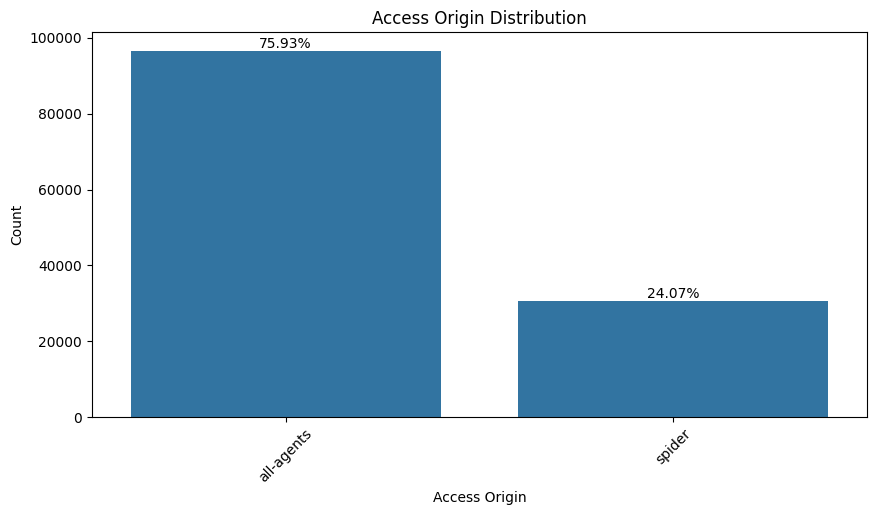

In [17]:
access_origin_counts = wiki_df['ACCESS_ORIGIN'].value_counts()
access_origin_percent = wiki_df['ACCESS_ORIGIN'].value_counts(normalize=True)

print(access_origin_counts, access_origin_percent)

plt.figure(figsize=(10, 5))
ax = sns.countplot(data=wiki_df, x='ACCESS_ORIGIN', order=access_origin_counts.index)
plt.title('Access Origin Distribution')
plt.xlabel('Access Origin')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add percentages to the bars
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / len(wiki_df):.2f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

ACCESS_TYPE
all-access    65713
mobile-web    30923
desktop       30572
Name: count, dtype: int64 ACCESS_TYPE
all-access    0.516579
mobile-web    0.243090
desktop       0.240331
Name: proportion, dtype: float64


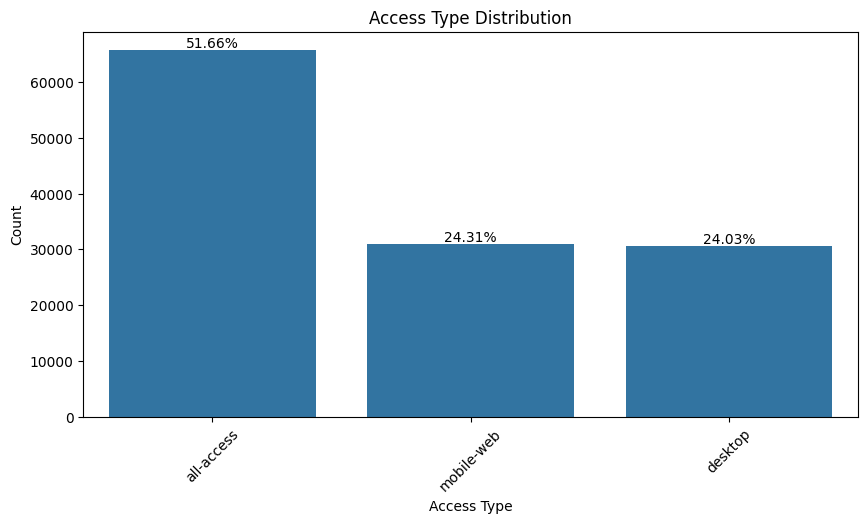

In [18]:
access_origin_counts = wiki_df['ACCESS_TYPE'].value_counts()
access_origin_percent = wiki_df['ACCESS_TYPE'].value_counts(normalize=True)

print(access_origin_counts, access_origin_percent)

plt.figure(figsize=(10, 5))
ax = sns.countplot(data=wiki_df, x='ACCESS_TYPE', order=access_origin_counts.index)
plt.title('Access Type Distribution')
plt.xlabel('Access Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add percentages to the bars
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / len(wiki_df):.2f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

LANGUAGE
EN    24108
JA    20431
DE    18547
FR    17802
ZH    17229
RU    15022
ES    14069
Name: count, dtype: int64 LANGUAGE
EN    0.189516
JA    0.160611
DE    0.145801
FR    0.139944
ZH    0.135440
RU    0.118090
ES    0.110598
Name: proportion, dtype: float64


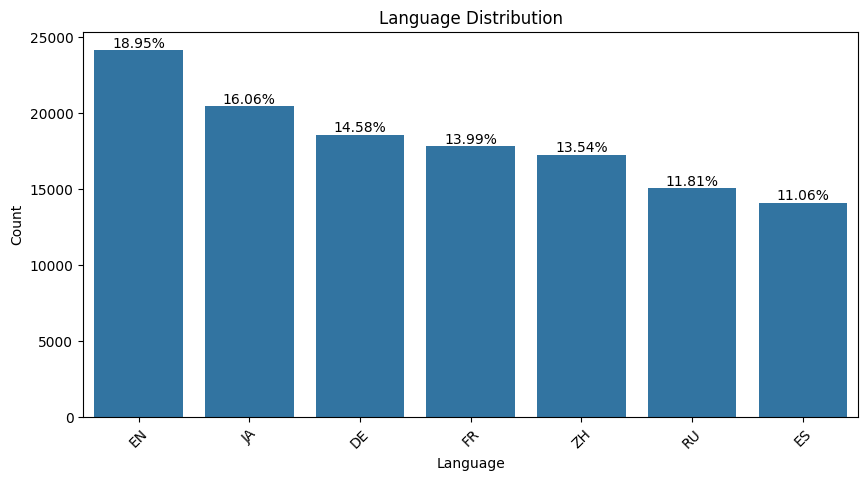

In [19]:
access_origin_counts = wiki_df['LANGUAGE'].value_counts()
access_origin_percent = wiki_df['LANGUAGE'].value_counts(normalize=True)

print(access_origin_counts, access_origin_percent)

plt.figure(figsize=(10, 5))
ax = sns.countplot(data=wiki_df, x='LANGUAGE', order=access_origin_counts.index)
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add percentages to the bars
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / len(wiki_df):.2f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

### Observations 🧐

#### Page Name Format:
The format for page names is as follows: SPECIFIC NAME _ LANGUAGE.wikipedia.org _ ACCESS TYPE _ ACCESS ORIGIN.

* Access Origin:
  - Approximately 75% of the traffic originates from All Agents.
  - Around 24% of the traffic comes from Spiders.
* Access Type:
  - About 50% of the traffic is from All Agents.
  - Mobile web and desktop each account for around 24% of the remaining traffic.
* Language Distribution:
  - English (EN) pages constitute 18% of the total pages.
  - Japanese (JA) pages make up 16% of the total pages.
  - German (DE) pages account for 14% of the total pages.
  - French (FR) pages represent 13% of the total pages.
  - Chinese (ZH) pages also contribute 13% of the total pages.
  - Russian (RU) pages make up 11% of the total pages.
  - Spanish (ES) pages account for 11% of the total pages.

- - - 

In [20]:
wiki_df

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,missing,TITLE,LANGUAGE,ACCESS_TYPE,ACCESS_ORIGIN
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,20.0,22.0,19.0,18.0,20.0,0,2NE1,ZH,all-access,spider
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,30.0,52.0,45.0,26.0,20.0,0,2PM,ZH,all-access,spider
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,4.0,6.0,3.0,4.0,17.0,0,3C,ZH,all-access,spider
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,11.0,17.0,19.0,10.0,11.0,0,4minute,ZH,all-access,spider
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.0,27.0,13.0,36.0,10.0,291,52_Hz_I_Love_You,ZH,all-access,spider
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,Underworld_(serie_de_películas)_es.wikipedia.o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.0,13.0,3.0,5.0,10.0,544,Underworld_(serie_de_películas),ES,all-access,spider
145059,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,550,Resident_Evil:_Capítulo_Final,ES,all-access,spider
145060,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,550,Enamorándome_de_Ramón,ES,all-access,spider
145061,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,550,Hasta_el_último_hombre,ES,all-access,spider


- - - 

## Model Ready Dataset Preparation ⛏️

In [21]:
date_views_df = pd.DataFrame()
date_views_df['Date'] = date_range

for lang in wiki_df['LANGUAGE'].unique():
    lang_df = wiki_df[wiki_df['LANGUAGE'] == lang]
    lang_df = lang_df.drop(['Page', 'missing', 'TITLE', 'LANGUAGE', 'ACCESS_TYPE', 'ACCESS_ORIGIN'], axis=1)
    lang_df = lang_df.sum(axis=0)
    date_views_df[lang] = lang_df.values

date_views_df

,Date,ZH,FR,EN,RU,DE,JA,ES
0,2015-07-01,4144988.0,8458638.0,84712190.0,9463854.0,13260519.0,11863200.0,15278553.0
1,2015-07-02,4151189.0,8512952.0,84438545.0,9627643.0,13079896.0,13620792.0,14601013.0
2,2015-07-03,4123659.0,8186030.0,80167728.0,8923463.0,12554042.0,12305383.0,13427632.0
3,2015-07-04,4163448.0,8749842.0,83463204.0,8393214.0,11520379.0,15456239.0,12606538.0
4,2015-07-05,4441286.0,8590493.0,86198637.0,8938528.0,13392347.0,14827204.0,13710356.0
...,...,...,...,...,...,...,...,...
545,2016-12-27,6478442.0,15281470.0,145628731.0,15040168.0,20125264.0,16123301.0,15945353.0
546,2016-12-28,6513400.0,13781521.0,141278366.0,14000319.0,19152389.0,16150715.0,16577375.0
547,2016-12-29,6042545.0,13399796.0,150557534.0,13478977.0,18447906.0,17682688.0,15647135.0
548,2016-12-30,6111203.0,12471074.0,125404585.0,12066750.0,17606030.0,19450687.0,11560095.0


In [22]:
date_views_df.isna().sum()

Date    0
ZH      0
FR      0
EN      0
RU      0
DE      0
JA      0
ES      0
dtype: int64

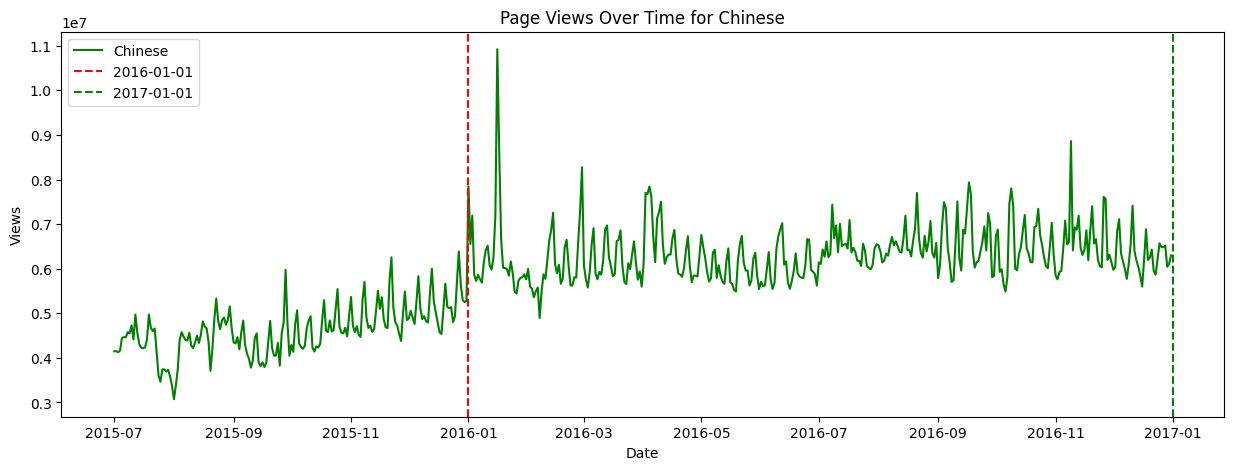

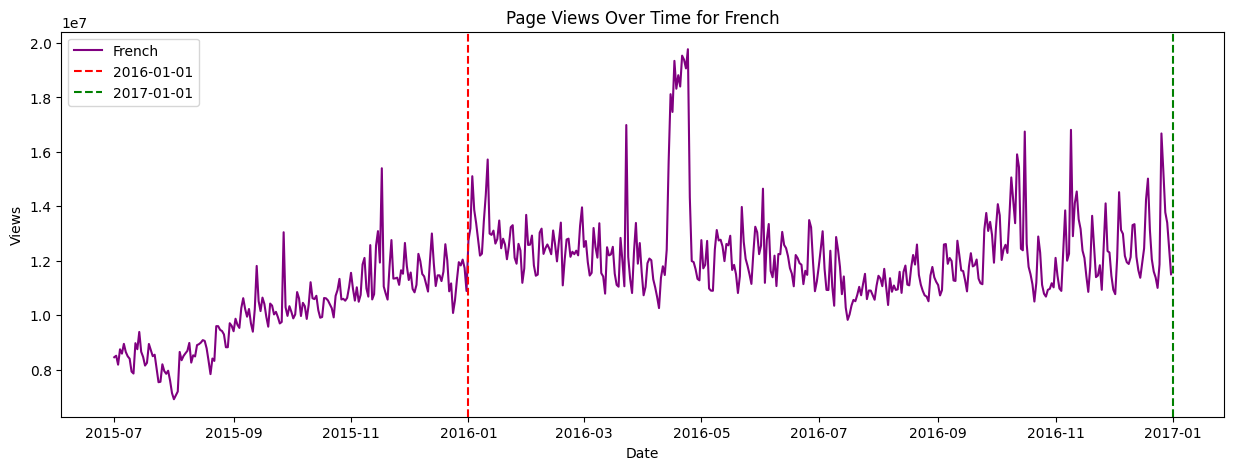

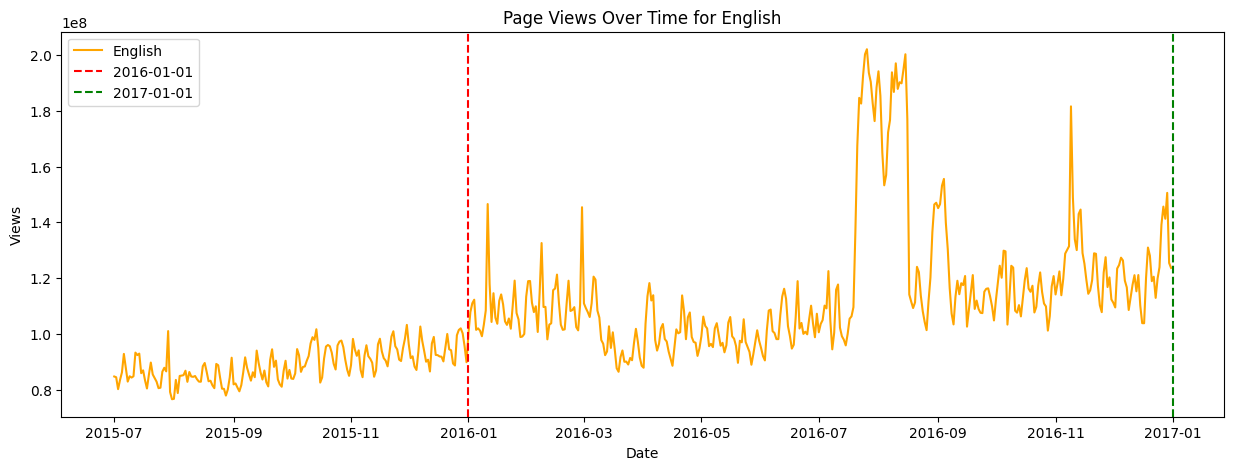

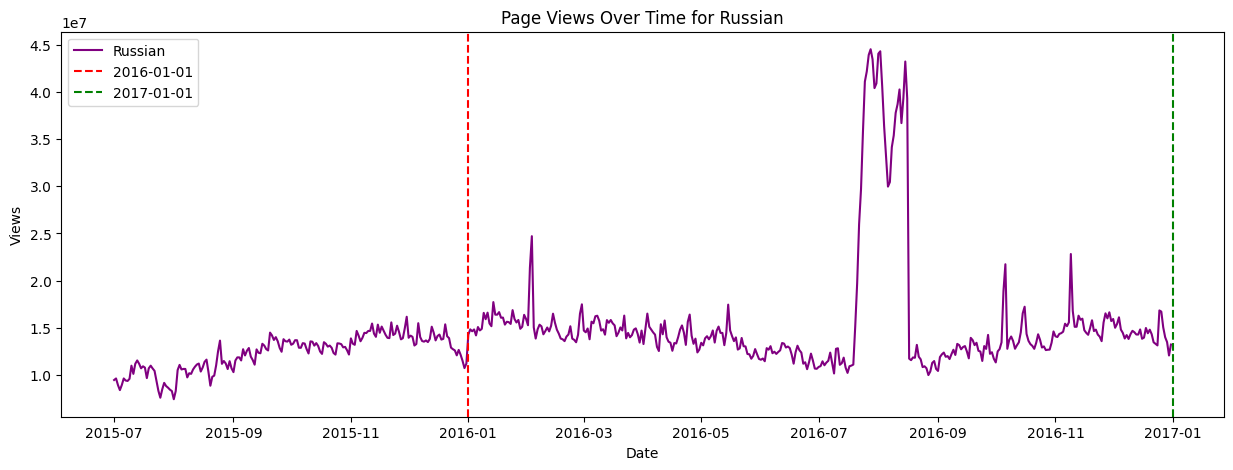

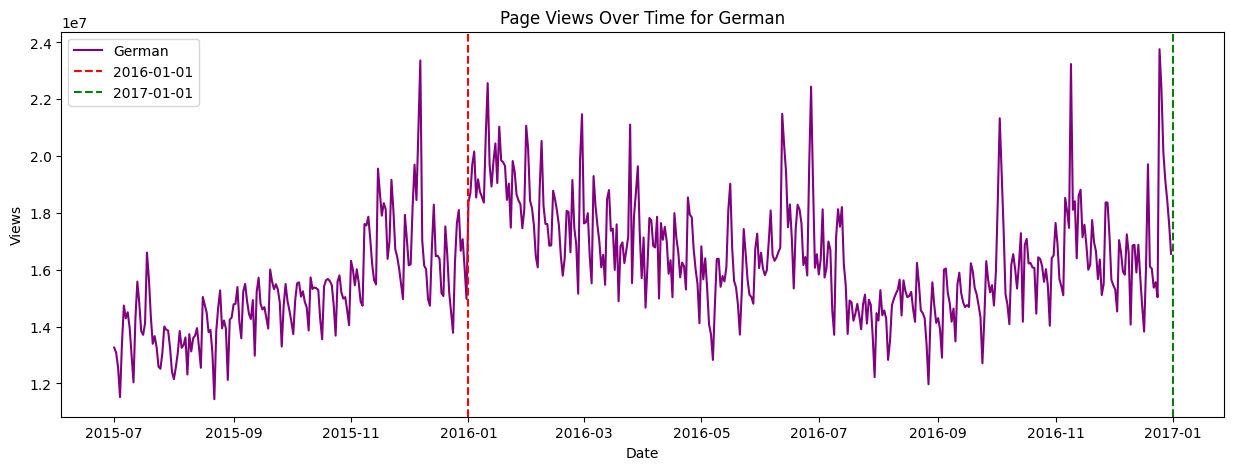

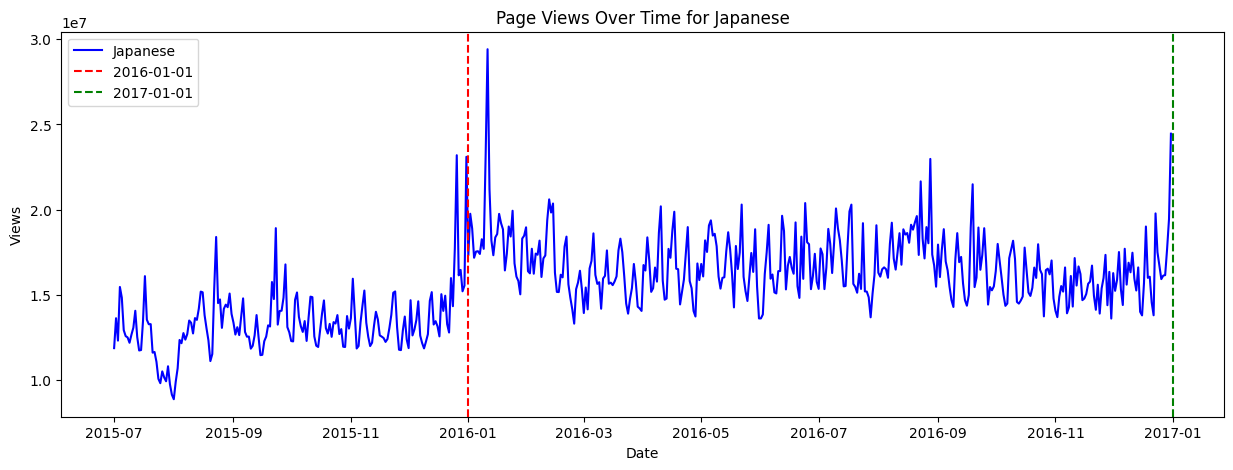

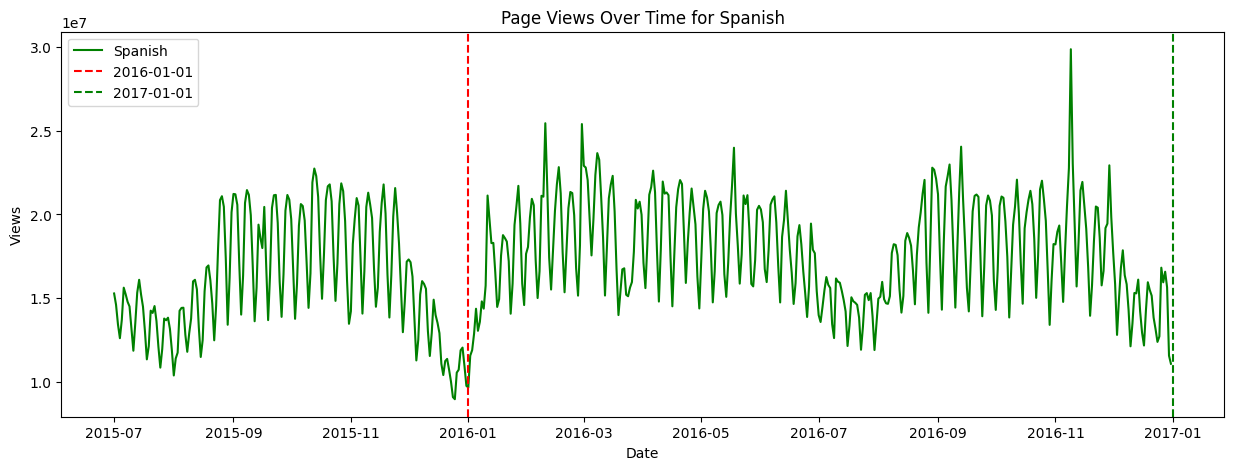

In [23]:
languages = wiki_df['LANGUAGE'].unique().tolist()
languages.remove('EN')

lang_map = {'ZH': 'Chinese', 'EN': 'English', 'RU': 'Russian', 'FR': 'French', 'DE': 'German', 'JA': 'Japanese', 'ES': 'Spanish'}

# plot for each language

for lang in wiki_df['LANGUAGE'].unique().tolist():
    plt.figure(figsize=(15, 5))
    plt.plot(date_views_df['Date'], date_views_df[lang], label=lang_map[lang], color=np.random.choice(['red', 'green', 'blue', 'yellow', 'orange', 'purple']))
    plt.title(f'Page Views Over Time for {lang_map[lang]}')
    plt.axvline(x=pd.to_datetime('2016-01-01'), color='r', linestyle='--', label='2016-01-01')
    plt.axvline(x=pd.to_datetime('2017-01-01'), color='g', linestyle='--', label='2017-01-01')
    plt.xlabel('Date')
    plt.ylabel('Views')
    plt.legend()
plt.show()

### Observations 🧐

#### Null Check: 
- There are no null values present after transforming the data.

#### Data Series:
- Chinese: The data exhibits an additive increasing trend.
- English: The data shows an additive increasing trend with noticeable peaks during specific periods.
- Russian:  The data appears to be more stationary.
- French: The data follows an increasing trend before 2016. From 2016 to 2017, the data remains within a range, with a few intermediate peaks.
- German: The data displays a seasonal up and down trend.
- Japanese: TThe data appears to be more stationary.
- Spanish:  The data exhibits a seasonal up and down trend.


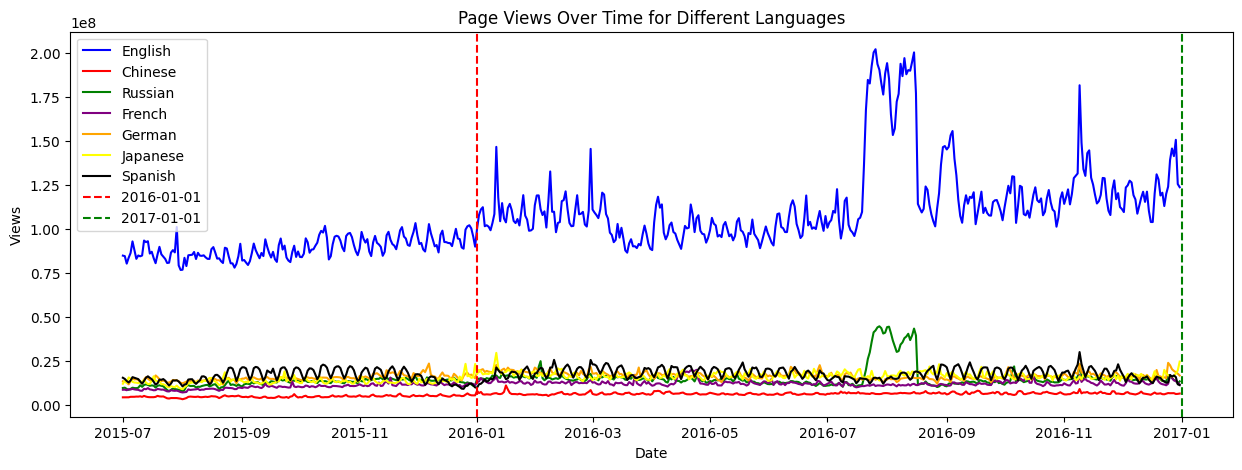

In [24]:
plt.figure(figsize=(15, 5))
plt.plot(date_views_df['Date'], date_views_df['EN'], label='English', color='blue')
plt.plot(date_views_df['Date'], date_views_df['ZH'], label='Chinese', color='red')
plt.plot(date_views_df['Date'], date_views_df['RU'], label='Russian', color='green')
plt.plot(date_views_df['Date'], date_views_df['FR'], label='French', color='purple')
plt.plot(date_views_df['Date'], date_views_df['DE'], label='German', color='orange')
plt.plot(date_views_df['Date'], date_views_df['JA'], label='Japanese', color='yellow')
plt.plot(date_views_df['Date'], date_views_df['ES'], label='Spanish', color='black')
plt.title('Page Views Over Time for Different Languages')

plt.axvline(x=pd.to_datetime('2016-01-01'), color='r', linestyle='--', label='2016-01-01')
plt.axvline(x=pd.to_datetime('2017-01-01'), color='g', linestyle='--', label='2017-01-01')
plt.xlabel('Date')
plt.ylabel('Views')
plt.legend()

plt.show()

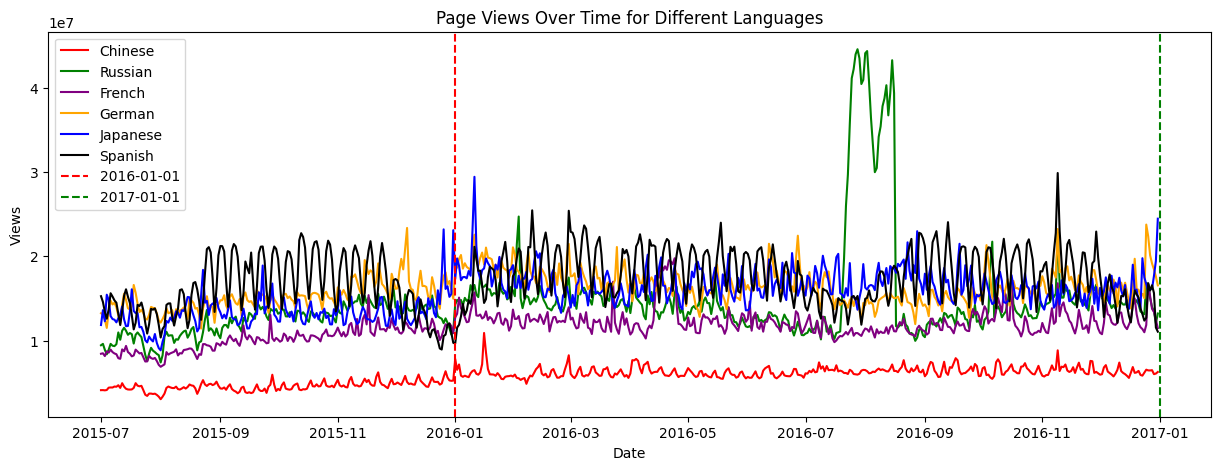

In [25]:
plt.figure(figsize=(15, 5))
plt.plot(date_views_df['Date'], date_views_df['ZH'], label='Chinese', color='red')
plt.plot(date_views_df['Date'], date_views_df['RU'], label='Russian', color='green')
plt.plot(date_views_df['Date'], date_views_df['FR'], label='French', color='purple')
plt.plot(date_views_df['Date'], date_views_df['DE'], label='German', color='orange')
plt.plot(date_views_df['Date'], date_views_df['JA'], label='Japanese', color='blue')
plt.plot(date_views_df['Date'], date_views_df['ES'], label='Spanish', color='black')
plt.title('Page Views Over Time for Different Languages')

plt.axvline(x=pd.to_datetime('2016-01-01'), color='r', linestyle='--', label='2016-01-01')
plt.axvline(x=pd.to_datetime('2017-01-01'), color='g', linestyle='--', label='2017-01-01')
plt.xlabel('Date')
plt.ylabel('Views')
plt.legend()

plt.show()

#### Compare the number of views in different languages ❓

* English has higher number of daily views compare to any other language
* Chinese has less daily views compare to other languages

### Stationary Check ☑️

In [26]:
date_views_df.set_index('Date', inplace=True)
date_views_df

,ZH,FR,EN,RU,DE,JA,ES
Date,,,,,,,
2015-07-01,4144988.0,8458638.0,84712190.0,9463854.0,13260519.0,11863200.0,15278553.0
2015-07-02,4151189.0,8512952.0,84438545.0,9627643.0,13079896.0,13620792.0,14601013.0
2015-07-03,4123659.0,8186030.0,80167728.0,8923463.0,12554042.0,12305383.0,13427632.0
2015-07-04,4163448.0,8749842.0,83463204.0,8393214.0,11520379.0,15456239.0,12606538.0
2015-07-05,4441286.0,8590493.0,86198637.0,8938528.0,13392347.0,14827204.0,13710356.0
...,...,...,...,...,...,...,...
2016-12-27,6478442.0,15281470.0,145628731.0,15040168.0,20125264.0,16123301.0,15945353.0
2016-12-28,6513400.0,13781521.0,141278366.0,14000319.0,19152389.0,16150715.0,16577375.0
2016-12-29,6042545.0,13399796.0,150557534.0,13478977.0,18447906.0,17682688.0,15647135.0


In [27]:
def check_stationarity(time_series):
    
    # Perform the Augmented Dickey-Fuller test
    adf_result = adfuller(time_series)
    
    # Extract the test statistic, p-value, and critical values
    test_statistic = adf_result[0]
    p_value = adf_result[1]
    critical_values = adf_result[4]
    
    # Determine if the series is stationary
    if p_value < 0.05:
        print('The time series is stationary.')
    else:
        print('The time series is not stationary.')
    
    # Return the results as a dictionary
    return {
        'ADF Test Statistic': test_statistic,
        'p-value': p_value,
        'Critical Values': critical_values
    }


In [28]:
# Check stationarity for each language

for lang in wiki_df['LANGUAGE'].unique().tolist():
    print(f'Language: {lang_map[lang]}')
    check_stationarity(date_views_df[lang])
    print("-"*50, '\n')
    

Language: Chinese
The time series is not stationary.
-------------------------------------------------- 

Language: French
The time series is not stationary.
-------------------------------------------------- 

Language: English
The time series is not stationary.
-------------------------------------------------- 

Language: Russian
The time series is stationary.
-------------------------------------------------- 

Language: German
The time series is not stationary.
-------------------------------------------------- 

Language: Japanese
The time series is not stationary.
-------------------------------------------------- 

Language: Spanish
The time series is stationary.
-------------------------------------------------- 



### Seasonality Check ☑️

In [29]:
def check_seasonality(language, frequency=30):

    # Decompose the time series
    decomposition = seasonal_decompose(date_views_df[language], model='additive', period=frequency)

    # Plot the decomposition
    
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

    plt.suptitle('Seasonal Decomposition for ' + lang_map[language])
    decomposition.observed.plot(ax=ax1, legend=False)
    ax1.set_ylabel('Observed')

    decomposition.trend.plot(ax=ax2, legend=False)
    ax2.set_ylabel('Trend')

    decomposition.seasonal.plot(ax=ax3, legend=False)
    ax3.set_ylabel('Seasonal')

    decomposition.resid.plot(ax=ax4, legend=False)
    ax4.set_ylabel('Residual')
    ax4.set_xlabel('Date')

    plt.tight_layout()
    plt.show()

    return {
        'Trend': decomposition.trend,
        'Seasonal': decomposition.seasonal,
        'Residual': decomposition.resid
    }


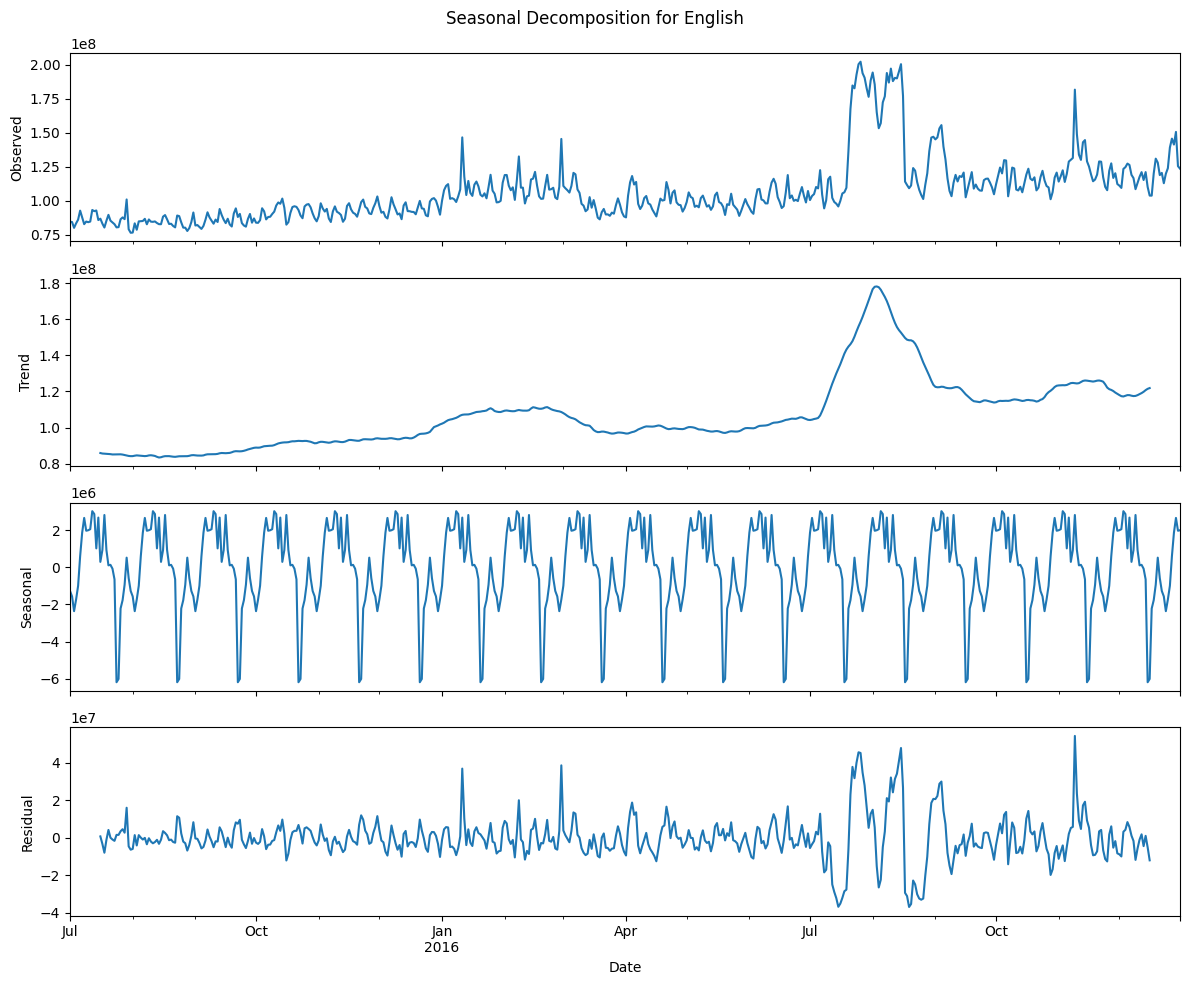

In [30]:
_ = check_seasonality('EN', frequency=30)

- - -
## English Page 🏴󠁮󠁧󠁥󠁮󠁿

#### Decomposition ❓

* Decomposition of a time series is a statistical method used to break down a time series into its constituent components. 
    - Trend Component 
    - Seasonal Component
    - Cyclical Component
    - Irregular Component


In [31]:
# Take the first difference of the time series

for lang in wiki_df['LANGUAGE'].unique().tolist():
    date_views_df[lang+'_diff'] = date_views_df[lang].diff()

In [32]:
# Perform the ADF test on a specific column, e.g., 'EN'
result = adfuller(date_views_df['EN'])

# Print the results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -2.2472840057446666
p-value: 0.18953359279992876
Critical Values:
   1%: -3.4426321555520905
   5%: -2.86695748394138
   10%: -2.5696553279762426


In [33]:
result_diff = adfuller(date_views_df['EN_diff'].dropna())

# Print the results
print('ADF Statistic (Differenced):', result_diff[0])
print('p-value (Differenced):', result_diff[1])
print('Critical Values (Differenced):')
for key, value in result_diff[4].items():
    print(f'   {key}: {value}')

ADF Statistic (Differenced): -8.254153104895686
p-value (Differenced): 5.2924746354369e-13
Critical Values (Differenced):
   1%: -3.4426321555520905
   5%: -2.86695748394138
   10%: -2.5696553279762426


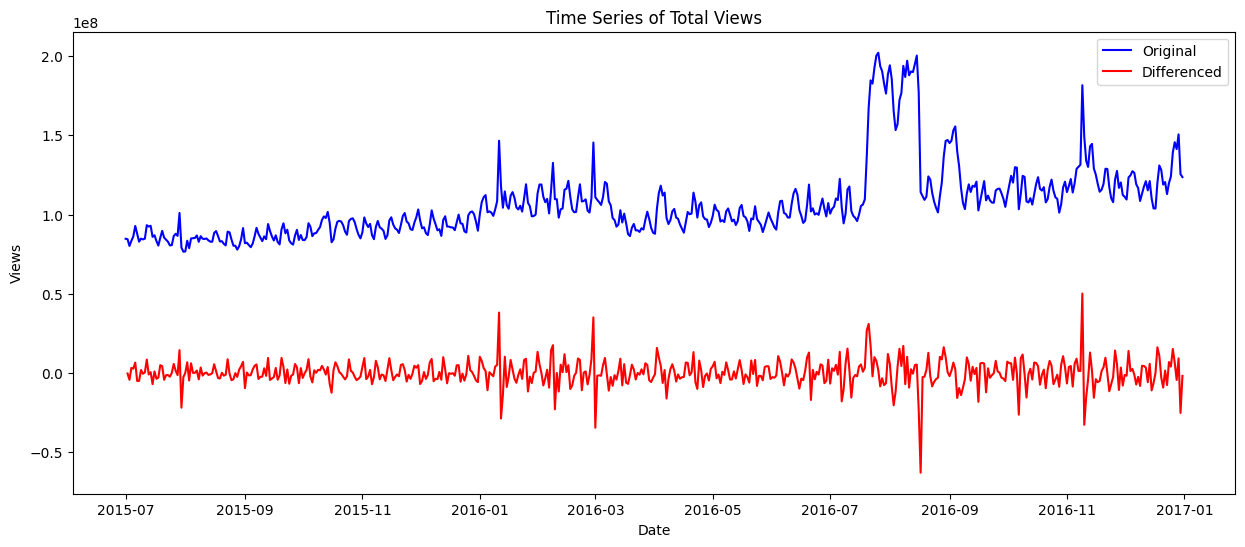

In [34]:
# Plot the time series
plt.figure(figsize=(15, 6))
plt.plot(date_views_df['EN'], label='Original', color='blue')
plt.plot(date_views_df['EN_diff'], label='Differenced', color='red')
plt.title(f'Time Series of Total Views')
plt.xlabel('Date')
plt.ylabel('Views')
plt.legend()
plt.show()

#### What level of differencing gave you a stationary series?❓
- Differencing of level 1 makes the data stationary series

### Observations 🧐

#### Original Data: 
* Since the ADF statistic (-2.2472840057446666) is higher than the critical values at the 1%, 5%, and 10% levels, and the p-value (0.18953359279992876) is greater than 0.05, we fail to reject the null hypothesis. 

This means that the original time series is not stationary.

#### Differenced Data:
* For the differenced time series, the ADF statistic (-8.254153104895686) is much lower than the critical values at the 1%, 5%, and 10% levels, and the p-value (5.2924746354369e-13) is significantly less than 0.05. 

Therefore, we reject the null hypothesis, indicating that the differenced time series is stationary.

#### Conclusion
* Since the original time series is not stationary, but the differenced time series is stationary, you should use the differenced data for your ARIMA model. 

Differencing the data has effectively removed the non-stationarity, making it suitable for time series forecasting.

### ACF and PACF plots 📈

<Figure size 1500x600 with 0 Axes>

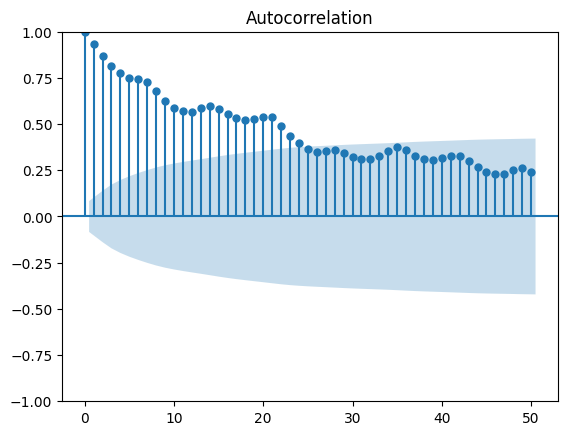

In [35]:
# Plot ACF
plt.figure(figsize=(15, 6))
plot_acf(date_views_df['EN'], lags=50)
plt.show()

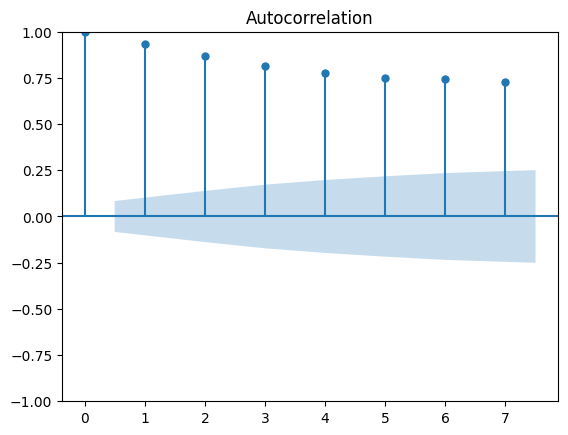

In [36]:
plot_acf(date_views_df['EN'], lags=7)
plt.show()

<Figure size 1500x600 with 0 Axes>

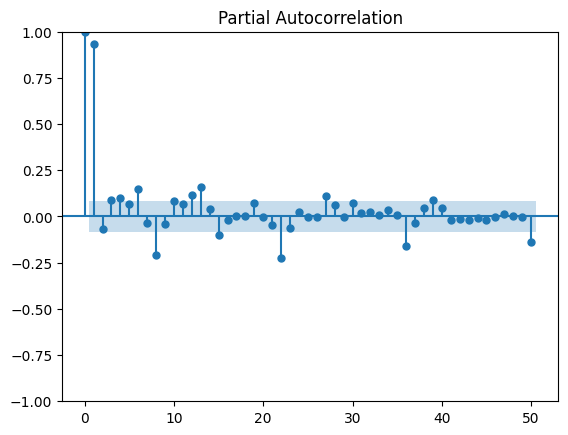

In [37]:
# Plot PACF
plt.figure(figsize=(15, 6))
plot_pacf(date_views_df['EN'], lags=50, method='ywm')
plt.show()

#### Observations 🧐

##### ACF Plot: 
* The ACF plot shows a seasonal peak every 7 days, indicating a weekly trend.

### Exoponential Smoothing 🛝

Smoothing Level: 0.01 - MSE: 377731906645562.56
Smoothing Level: 0.2 - MSE: 126560396928220.38
Smoothing Level: 0.3 - MSE: 105104189964734.28
Smoothing Level: 0.5 - MSE: 84682462480172.02
Smoothing Level: 0.7 - MSE: 75008289560125.16
Smoothing Level: 0.9 - MSE: 70179797415225.4


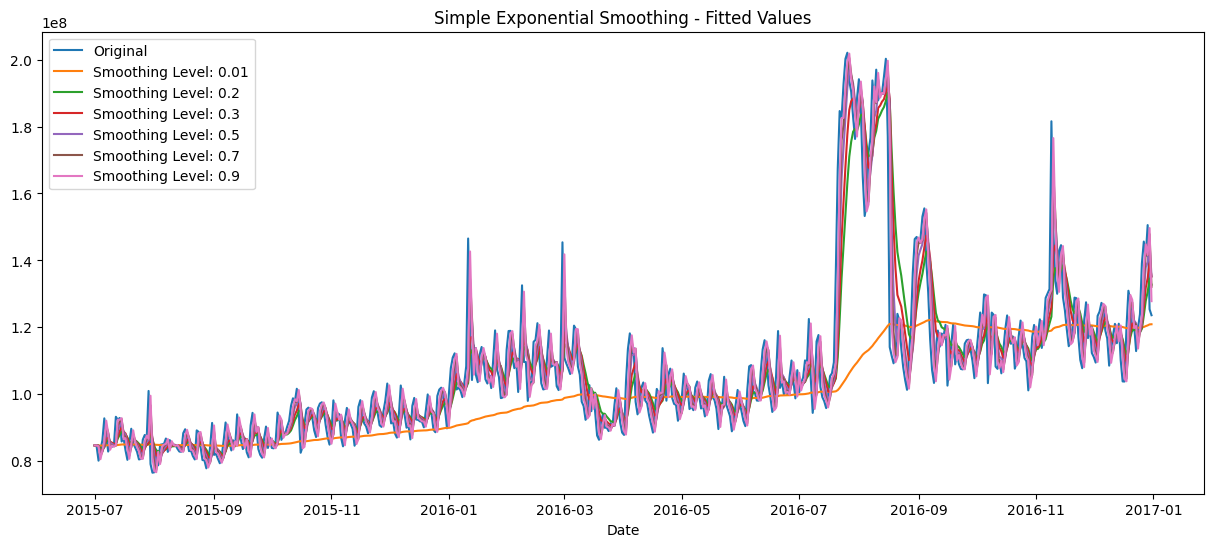

In [38]:

smoothing_level_values = [0.01, 0.2, 0.3,  0.5,  0.7,  0.9]


# Plot the original data and the fitted values
plt.figure(figsize=(15, 6))
plt.plot(date_views_df['EN'], label='Original')


for sl in smoothing_level_values:
    model = sm.tsa.SimpleExpSmoothing(date_views_df['EN']).fit(smoothing_level=sl)
    fitted_values = model.fittedvalues
    mse_ = mse(date_views_df['EN'], fitted_values)
    print(f'Smoothing Level: {sl} - MSE: {mse_}')
    plt.plot(fitted_values, label=f'Smoothing Level: {sl}')

plt.xlabel('Date')
plt.title('Simple Exponential Smoothing - Fitted Values')
plt.legend()
plt.show()

#### Observations 🧐
* By using a smoothing level of 0.5, you should achieve a good balance between capturing the trend and seasonality while avoiding overfitting.

Optimal Smoothing Level: 0.5


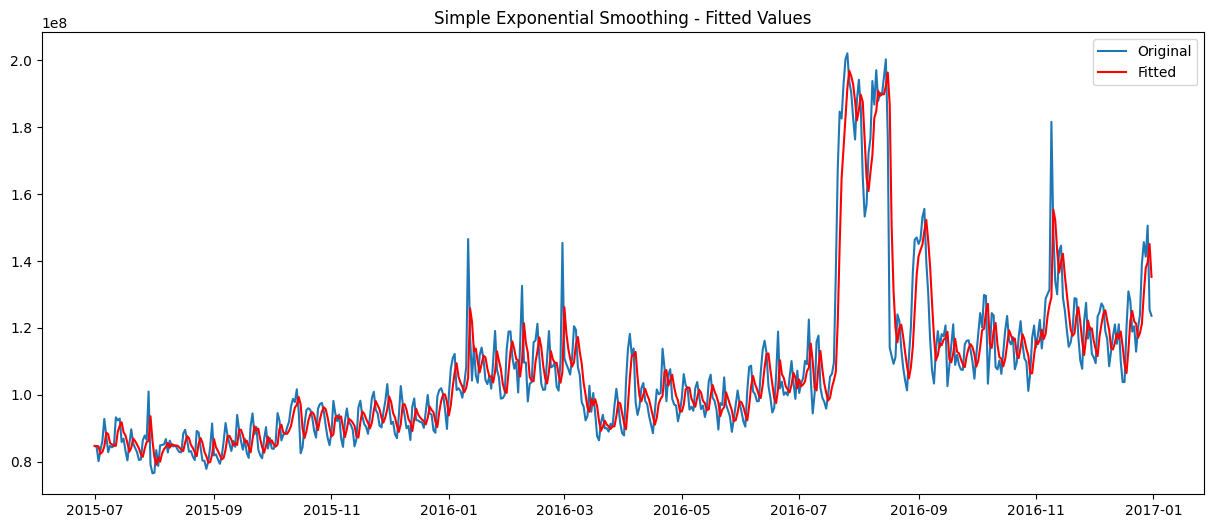

MAE: 6368108.346375721
MSE: 84682462480172.02
RMSE: 9202307.454121059


In [39]:
optimal_model = sm.tsa.SimpleExpSmoothing(date_views_df['EN']).fit(smoothing_level=0.5)

# Extract the fitted values
fitted_values = optimal_model.fittedvalues

# Print the optimal smoothing level
print(f'Optimal Smoothing Level: {optimal_model.model.params["smoothing_level"]}')

# Plot the original data and the fitted values
plt.figure(figsize=(15, 6))
plt.plot(date_views_df['EN'], label='Original')
plt.plot(fitted_values, color='red', label='Fitted')
plt.title('Simple Exponential Smoothing - Fitted Values')
plt.legend()
plt.show()

mae_ = mae(date_views_df['EN'], fitted_values)
mse_ = mse(date_views_df['EN'], fitted_values)
rmse = np.sqrt(mse_)

print(f'MAE: {mae_}')
print(f'MSE: {mse_}')
print(f'RMSE: {rmse}')

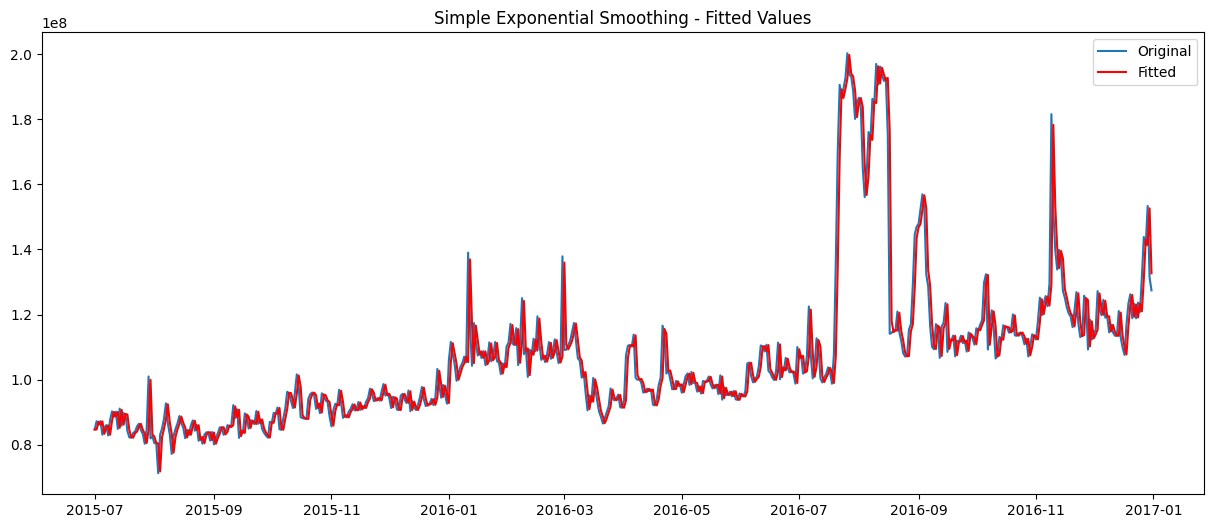

MAE: 4283515.4418008905
MSE: 51044489960174.23
RMSE: 7144542.669770699


In [40]:
# Prepare the EN time series, De-seasoning
decomposition = seasonal_decompose(date_views_df['EN'], model='additive', period=7)
date_views_df['EN_deseasoned'] = date_views_df['EN'] - decomposition.seasonal

# Fit the model
optimal_model = sm.tsa.SimpleExpSmoothing(date_views_df['EN_deseasoned']).fit()

# Extract the fitted values
fitted_values = optimal_model.fittedvalues

# Plot the original data and the fitted values
plt.figure(figsize=(15, 6))
plt.plot(date_views_df['EN_deseasoned'], label='Original')
plt.plot(fitted_values, color='red', label='Fitted')
plt.title('Simple Exponential Smoothing - Fitted Values')
plt.legend()
plt.show()

mae_ = mae(date_views_df['EN_deseasoned'], fitted_values)
mse_ = mse(date_views_df['EN_deseasoned'], fitted_values)
rmse = np.sqrt(mse_)

print(f'MAE: {mae_}')
print(f'MSE: {mse_}')
print(f'RMSE: {rmse}')


<Figure size 1000x600 with 0 Axes>

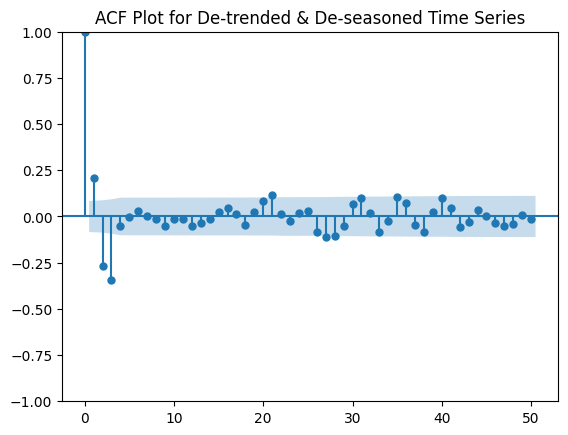

In [41]:

# Decompose the time series
decomposition = seasonal_decompose(date_views_df['EN'], model='additive', period=7)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Remove trend and seasonality
detrended_deseasoned = date_views_df['EN'] - trend - seasonal

# Drop NaN values resulting from the decomposition
detrended_deseasoned.dropna(inplace=True)

plt.figure(figsize=(10, 6))
plot_acf(detrended_deseasoned, lags=50)
plt.title('ACF Plot for De-trended & De-seasoned Time Series')
plt.show()

#### Observations 🧐
* By using a weekly seasonal decomposition, we should achieve a good balance between capturing the trend and seasonality while avoiding overfitting.

#### Difference between ARIMA, SARIMA & SARIMAX ❓

| Model    | Seasonality                                                                 | Exogenous Variables                                                                 | Complexity                                                                 |
|----------|-----------------------------------------------------------------------------|-------------------------------------------------------------------------------------|---------------------------------------------------------------------------|
| ARIMA    | Does not handle seasonality.                                                | Does not include exogenous variables.                                                | Simpler model, suitable for non-seasonal data.                             |
| SARIMA   | Handles seasonality by including seasonal components.                      | Does not include exogenous variables.                                                | More complex due to the inclusion of seasonal components.                  |
| SARIMAX  | Handles seasonality and also includes exogenous variables.                 | Includes exogenous variables, allowing for the incorporation of external predictors. | Most complex, as it includes both seasonal components and exogenous variables. |


- - -

### Train with ARIMA

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  544
Model:                 ARIMA(1, 0, 7)   Log Likelihood               -9104.330
Date:                Thu, 26 Dec 2024   AIC                          18228.661
Time:                        15:08:48   BIC                          18271.650
Sample:                    07-04-2015   HQIC                         18245.468
                         - 12-28-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3012.6970   3170.793     -0.950      0.342   -9227.338    3201.944
ar.L1         -0.5803      0.908     -0.639      0.523      -2.361       1.200
ma.L1          0.6379      0.910      0.701      0.4

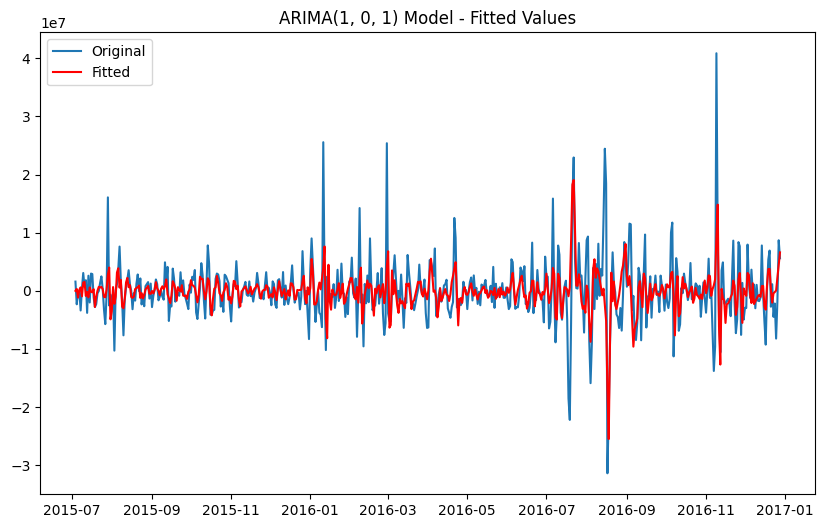

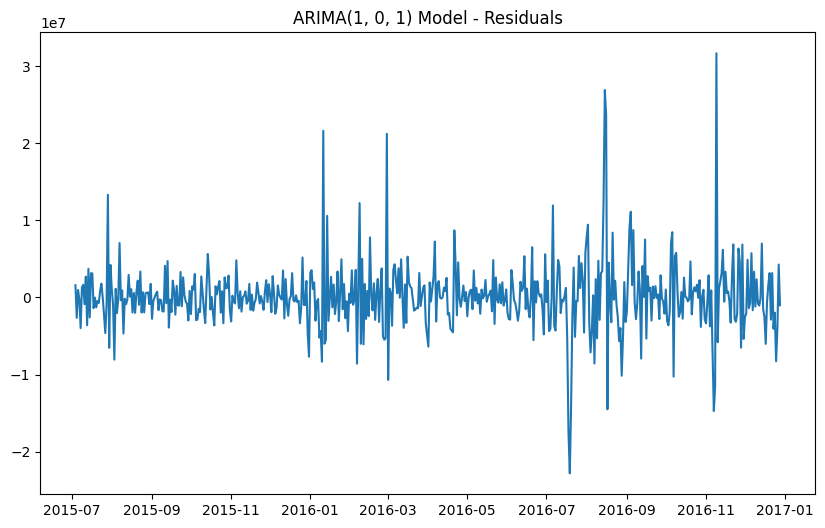

In [42]:
# Fit the ARIMA model
model = ARIMA(detrended_deseasoned, order=(1, 0, 7)).fit()

# Summary of the model
print(model.summary())

# Plot the original and fitted values
plt.figure(figsize=(10, 6))
plt.plot(detrended_deseasoned, label='Original')
plt.plot(model.fittedvalues, label='Fitted', color='red')
plt.title('ARIMA(1, 0, 1) Model - Fitted Values')
plt.legend()
plt.show()

# Calculate the residuals
residuals = detrended_deseasoned - model.fittedvalues

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('ARIMA(1, 0, 1) Model - Residuals')
plt.show()


In [43]:
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3))
    print('MAPE:', round(mape(actual, predicted), 3))

In [44]:
performance(detrended_deseasoned, model.fittedvalues)

MAE : 2833352.615
RMSE : 4474010.161
MAPE: 3.559


#### Interpretation ☘️:
* The model includes one autoregressive term (AR(1)) and seven moving average terms (MA(1) to MA(7)).
* The constant term and most of the AR and MA coefficients are not statistically significant (p-value > 0.05), except for MA(2) and MA(3), which are significant at the 5% level.
* The high value of the variance of residuals (sigma2) indicates substantial variability in the residuals.

Overall, while the model captures some aspects of the data, the lack of significance in most coefficients and the non-normality of residuals suggest that there may be room for improvement in the model.

### Train SARIMAX model

In [45]:
exog_df = pd.read_csv('../data/Exog_Campaign_eng.csv')
exog_df.shape

(550, 1)

In [46]:
print(exog_df.isna().sum())
exog_df.head()

Exog    0
dtype: int64


,Exog
0,0
1,0
2,0
3,0
4,0


In [47]:
exog_df.index = pd.to_datetime(date_range)
exog_df.head()

,Exog
2015-07-01,0
2015-07-02,0
2015-07-03,0
2015-07-04,0
2015-07-05,0


#### Train Test Data Split

In [48]:
days_to_forecast = 30
train_max_date = date_views_df.index[-days_to_forecast]



train_x = date_views_df.loc[date_views_df.index < date_views_df.index[-days_to_forecast]].copy()
test_x = date_views_df.loc[date_views_df.index >= date_views_df.index[-days_to_forecast]].copy()

train_exog = exog_df.loc[exog_df.index < exog_df.index[-days_to_forecast]].copy()
test_exog = exog_df.loc[exog_df.index >= exog_df.index[-days_to_forecast]].copy()


In [49]:
# train with exog variable
sarima_model = SARIMAX(train_x['EN'], exog=train_exog['Exog'] ,order=(1, 0, 7), seasonal_order=(1, 1, 1, 12)).fit(disp=False)

# Summary of the model
print(sarima_model.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                   EN   No. Observations:                  520
Model:             SARIMAX(1, 0, 7)x(1, 1, [1], 12)   Log Likelihood               -8834.228
Date:                              Thu, 26 Dec 2024   AIC                          17692.456
Time:                                      15:08:52   BIC                          17743.221
Sample:                                  07-01-2015   HQIC                         17712.362
                                       - 12-01-2016                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Exog        4.534e+07   2.08e-09   2.18e+16      0.000    4.53e+07    4.53e+07
ar.L1          0.99

In [50]:
test_x['pred'] = sarima_model.forecast(steps=days_to_forecast , exog = test_exog['Exog'])
test_x[['lower', 'upper']] = sarima_model.get_forecast(steps = days_to_forecast,  exog = test_exog['Exog']).conf_int(0.05).values

print("Performance: ")
performance(test_x['EN'], test_x['pred'])

Performance: 
MAE : 7937487.603
RMSE : 9992041.242
MAPE: 0.064


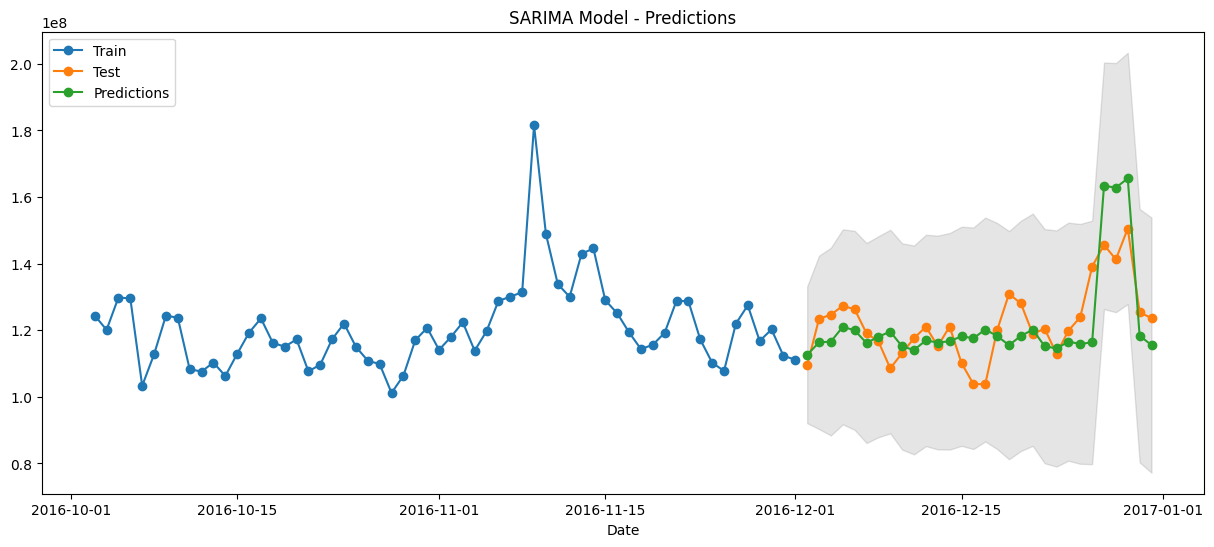

In [51]:

plt.figure(figsize=(15, 6))

plt.plot(train_x['EN'][-60:], label='Train', linestyle='-', marker='o')
plt.plot(test_x['EN'], label='Test', linestyle='-', marker='o')
plt.plot(test_x['pred'], label='Predictions', linestyle='-', marker='o')

plt.fill_between(test_x.index, test_x['lower'], test_x['upper'],
                 color='k', alpha=.10)

plt.xlabel('Date')
plt.title('SARIMA Model - Predictions')
plt.legend()
plt.show()


#### Interpretation ☘️:
* SARIMAX has a significantly lower AIC (17692.456) compared toARIMA (18228.661), indicating a better fit.
* SARIMAX also has a lower BIC (17743.221) and HQIC (17712.362) compared to ARIMA (BIC: 18271.650, HQIC: 18245.468), further supporting a better fit.
* SARIMAX has a higher Log Likelihood (-8834.228) compared to ARIMA (-9104.330), indicating a better fit.

It has significantly lower AIC, BIC, and a higher Log Likelihood compared to ARIMA. Therefore, SARIMAX is selected as the best model for the given data.

### Train Prophet model

In [52]:
prop_df = date_views_df[['EN']].reset_index()
prop_df.columns = ['ds', 'y']
prop_df.head()

,ds,y
0,2015-07-01,84712190.0
1,2015-07-02,84438545.0
2,2015-07-03,80167728.0
3,2015-07-04,83463204.0
4,2015-07-05,86198637.0


In [53]:
prop_df['ds'] = pd.to_datetime(prop_df['ds'])
prop_df['exo'] = exog_df['Exog'].values

prop_df.head()

,ds,y,exo
0,2015-07-01,84712190.0,0
1,2015-07-02,84438545.0,0
2,2015-07-03,80167728.0,0
3,2015-07-04,83463204.0,0
4,2015-07-05,86198637.0,0


In [54]:
train_df = prop_df[:-days_to_forecast]
test_df = prop_df[-days_to_forecast:]

train_df.shape, test_df.shape

((520, 3), (30, 3))

In [55]:
m = Prophet(yearly_seasonality=True, weekly_seasonality=True)
m.add_regressor('exo')
m.fit(train_df)

future_dates = m.make_future_dataframe(periods=len(test_df))

# Add the exogenous variable to the future dataframe
future_dates['exo'] = pd.concat([train_df['exo'], test_df['exo']]).reset_index(drop=True)

# Make predictions
forecast = m.predict(future_dates)
forecast.tail()

15:08:53 - cmdstanpy - INFO - Chain [1] start processing
15:08:53 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,exo,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
545,2016-12-27,1.171097e+08,1.533145e+08,1.766247e+08,1.170519e+08,1.171638e+08,4.773298e+07,4.773298e+07,4.773298e+07,4.383312e+07,...,1.691483e+06,1.691483e+06,1.691483e+06,2.208379e+06,2.208379e+06,2.208379e+06,0.0,0.0,0.0,1.648427e+08
546,2016-12-28,1.171317e+08,1.513925e+08,1.743926e+08,1.170695e+08,1.171906e+08,4.603620e+07,4.603620e+07,4.603620e+07,4.383312e+07,...,-4.894587e+05,-4.894587e+05,-4.894587e+05,2.692540e+06,2.692540e+06,2.692540e+06,0.0,0.0,0.0,1.631679e+08
547,2016-12-29,1.171537e+08,1.496566e+08,1.736910e+08,1.170878e+08,1.172171e+08,4.443917e+07,4.443917e+07,4.443917e+07,4.383312e+07,...,-2.575789e+06,-2.575789e+06,-2.575789e+06,3.181841e+06,3.181841e+06,3.181841e+06,0.0,0.0,0.0,1.615929e+08
548,2016-12-30,1.171757e+08,1.046439e+08,1.269367e+08,1.171049e+08,1.172445e+08,-1.254610e+06,-1.254610e+06,-1.254610e+06,0.000000e+00,...,-4.926220e+06,-4.926220e+06,-4.926220e+06,3.671611e+06,3.671611e+06,3.671611e+06,0.0,0.0,0.0,1.159211e+08
549,2016-12-31,1.171977e+08,1.068367e+08,1.295274e+08,1.171209e+08,1.172716e+08,1.181872e+06,1.181872e+06,1.181872e+06,0.000000e+00,...,-2.975503e+06,-2.975503e+06,-2.975503e+06,4.157375e+06,4.157375e+06,4.157375e+06,0.0,0.0,0.0,1.183796e+08


In [56]:
forecast_test = forecast[-len(test_df):]

# Calculate evaluation metrics
y_true = test_df['y'].values
y_pred = forecast_test['yhat'].values

performance(y_true, y_pred)

MAE : 6168372.58
RMSE : 8106833.47
MAPE: 0.048


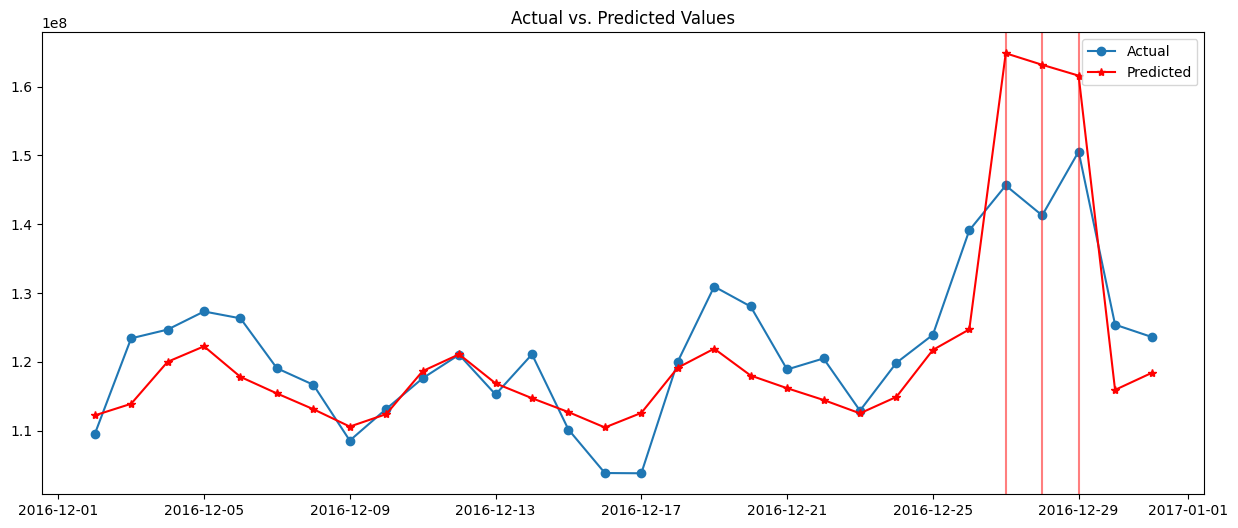

In [57]:
# Plot the actual vs. predicted values
plt.figure(figsize=(15, 6))
plt.plot(test_df['ds'], y_true, label='Actual', marker='o')
plt.plot(test_df['ds'], y_pred, label='Predicted', color='red', marker='*')

for x in test_df.query('exo==1')['ds']:
    plt.axvline(x=x, color='red', alpha = 0.5);

plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

In [58]:
fig1 = plot_plotly(m, forecast)
fig1.show()

# Plot the forecast components
fig2 = plot_components_plotly(m, forecast)
fig2.show()

#### Interpretation ☘️:
* Facebook's Prophet has the lower MAPE of 0.048 compare to the SARIMAX's MAPE of 0.064
* This indicates that Prophet better fits the given data

- - - 
## Train Other Languages

In [59]:
lang_map

{'ZH': 'Chinese',
 'EN': 'English',
 'RU': 'Russian',
 'FR': 'French',
 'DE': 'German',
 'JA': 'Japanese',
 'ES': 'Spanish'}

In [60]:
# Plot ACF
def plot_acf_language(lang):
    plt.figure(figsize=(15, 6))
    plot_acf(date_views_df[lang], lags=50)
    plt.title(f'ACF Plot for {lang_map[lang]}')
    plt.show()

<Figure size 1500x600 with 0 Axes>

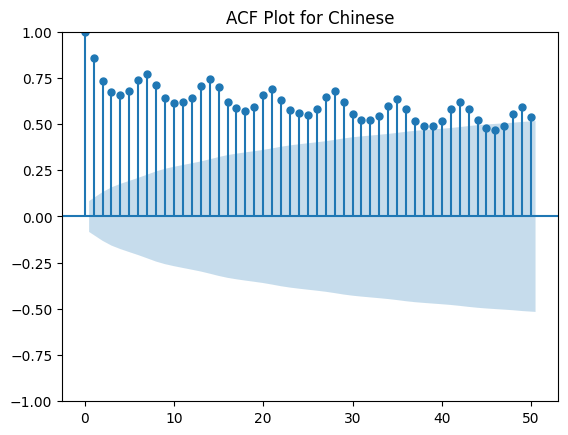

<Figure size 1500x600 with 0 Axes>

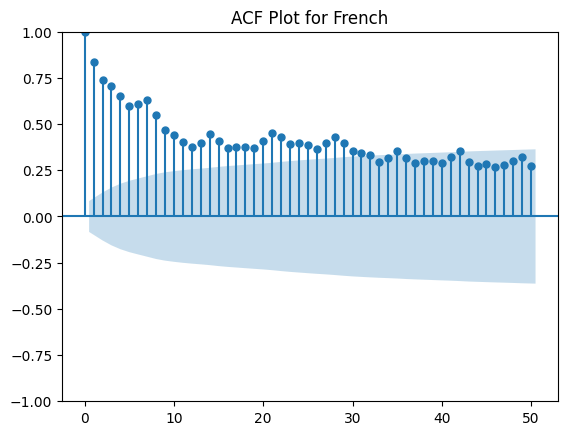

<Figure size 1500x600 with 0 Axes>

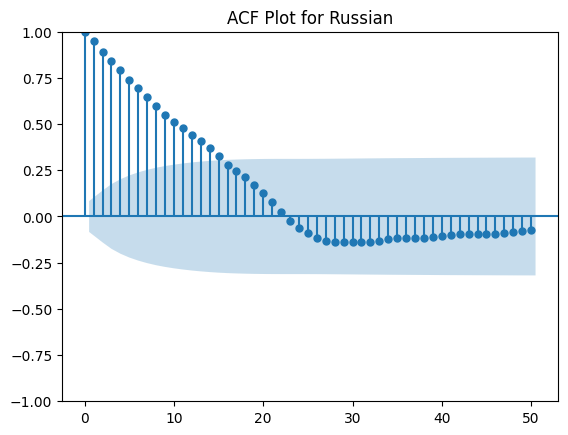

<Figure size 1500x600 with 0 Axes>

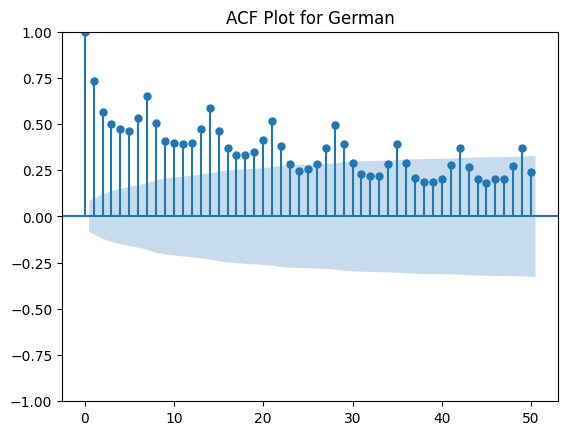

<Figure size 1500x600 with 0 Axes>

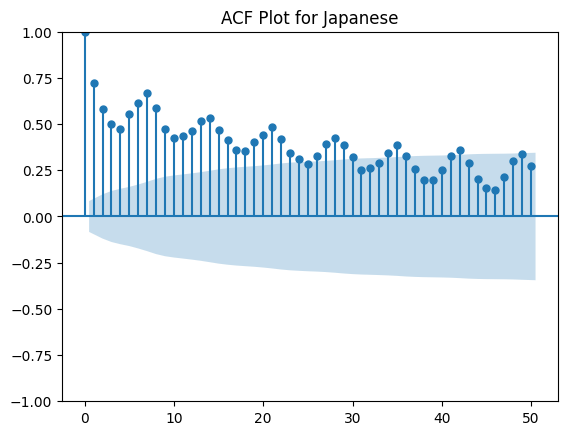

<Figure size 1500x600 with 0 Axes>

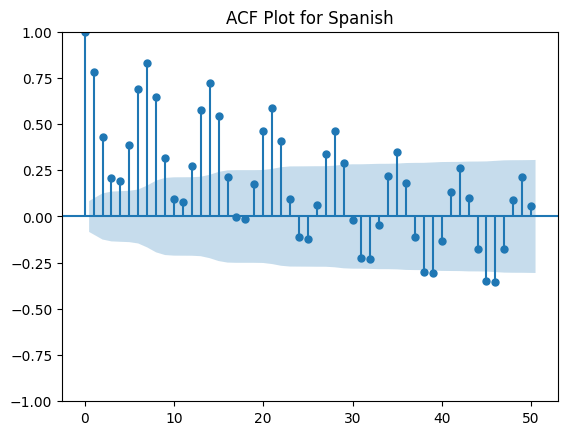

In [61]:
for lang in languages:
    plot_acf_language(lang)

#### Observations 🧐

##### ACF Plot: 
* The ACF plot shows a seasonal peak every 7 days, indicating a weekly trend for all language expect Russian.

- - -

### Training Pipeline for Other Languages 🪈

In [62]:
# Create a pipeline to forecast the views for all languages
languages = ['ZH', 'FR', 'RU', 'DE', 'JA', 'ES']

def forecast_pipeline(df, days_to_forecast=30):
    date_views_df = df.copy()
    
    # Initialize the forecast dataframe
    forecast_df = pd.DataFrame()

    for lang in languages:
        print("*"*50, lang, "*"*50)
        print(f'Forecasting for {lang}...')
        prop_df = date_views_df[[lang]].reset_index()
        prop_df.columns = ['ds', 'y']
        prop_df['ds'] = pd.to_datetime(prop_df['ds'])

        train_df = prop_df[:-days_to_forecast]
        test_df = prop_df[-days_to_forecast:]

        # Initialize the model
        yearly_seasonality = True if lang in ['DE','JA', 'ES'] else False
        # weekly_seasonality = True if lang not in ['ZH', 'FR', 'RU'] else False
        m = Prophet(yearly_seasonality=yearly_seasonality, weekly_seasonality=True)
        m.fit(train_df)

        future_dates = m.make_future_dataframe(periods=len(test_df))

        forecast = m.predict(future_dates)
        forecast_test = forecast[-len(test_df):]

        y_true = test_df['y'].values
        y_pred = forecast_test['yhat'].values

        print(f'Performance for {lang}:')
        performance(y_true, y_pred)

        # Future predications
        future_dates = m.make_future_dataframe(periods=len(test_df)+30)

        forecast = m.predict(future_dates)
        forecast_future = forecast[-len(test_df)+30:]
        forecast_future = forecast_future[-30:]

        # Plot the actual vs. predicted values
        plt.figure(figsize=(15, 6))
        plt.plot(train_df['ds'][-60:], train_df['y'][-60:], label='Training', marker='o', color='orange')
        plt.plot(test_df['ds'], y_true, label='Actual', marker='o', color='green')
        plt.plot(test_df['ds'], y_pred, label='Predicted', color='red', marker='*')
        plt.plot(forecast_future['ds'], forecast_future['yhat'], label='Future Pred', color='blue', marker='*')

        plt.fill_between(forecast_future['ds'], forecast_future['yhat_lower'], forecast_future['yhat_upper'],
                 color='k', alpha=.10)

        plt.title(f'Actual vs. Predicted Values for {lang_map[lang]}')
        plt.legend()
        plt.show()
        

        predictation_df = forecast_future[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
        predictation_df['Language'] = lang
        forecast_df = pd.concat([forecast_df, predictation_df])

        print("*"*50, lang, "*"*50)
        print("\n\n")
    
    
    return forecast_df
    


15:08:55 - cmdstanpy - INFO - Chain [1] start processing


************************************************** ZH **************************************************
Forecasting for ZH...


15:08:56 - cmdstanpy - INFO - Chain [1] done processing


Performance for ZH:
MAE : 407575.774
RMSE : 466456.482
MAPE: 0.066


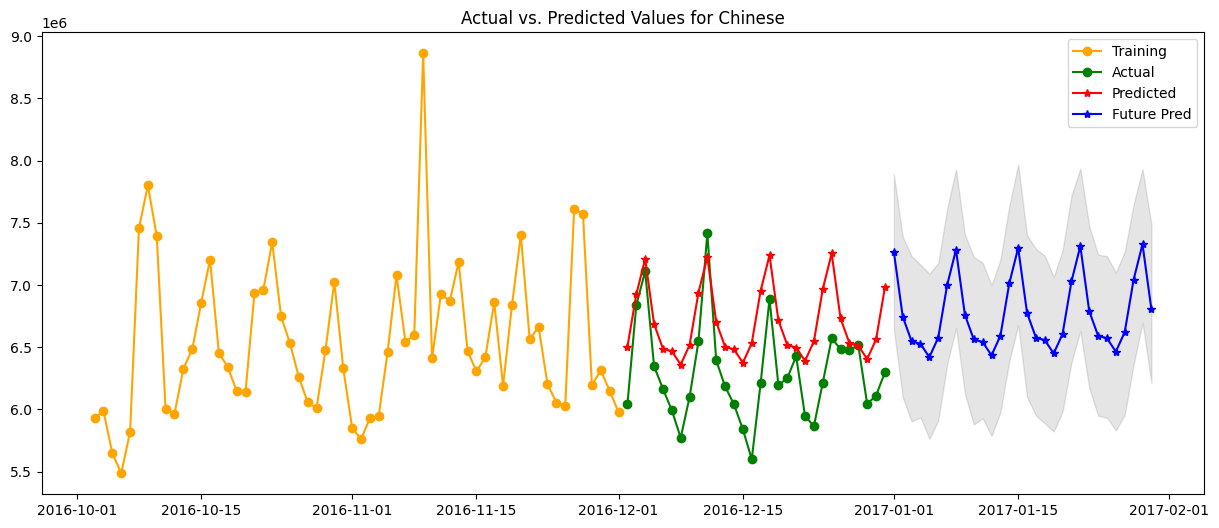

15:08:56 - cmdstanpy - INFO - Chain [1] start processing


************************************************** ZH **************************************************



************************************************** FR **************************************************
Forecasting for FR...


15:08:56 - cmdstanpy - INFO - Chain [1] done processing


Performance for FR:
MAE : 862881.13
RMSE : 1200957.325
MAPE: 0.065


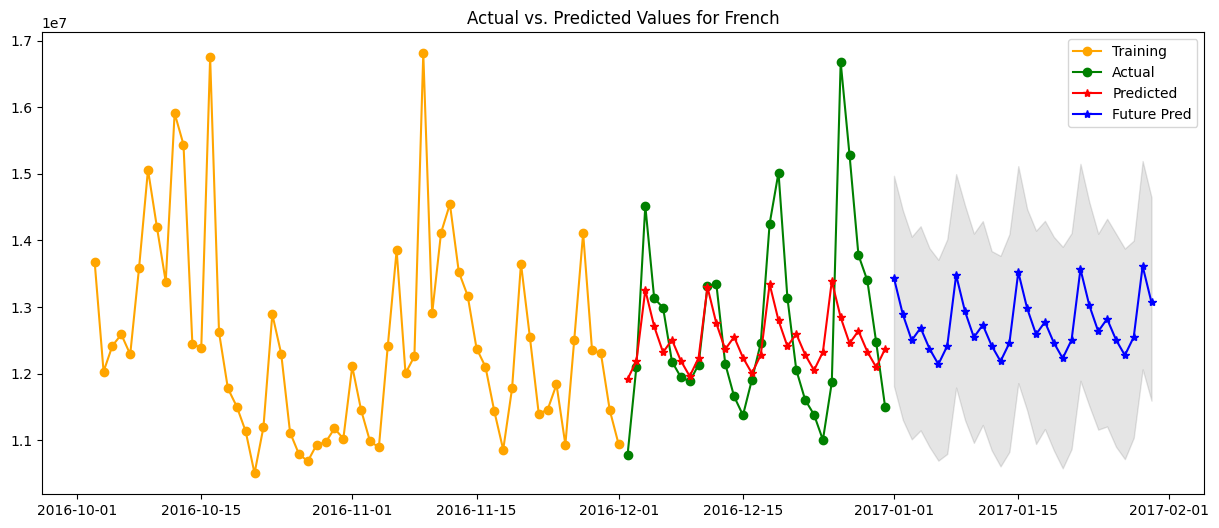

15:08:57 - cmdstanpy - INFO - Chain [1] start processing


************************************************** FR **************************************************



************************************************** RU **************************************************
Forecasting for RU...


15:08:57 - cmdstanpy - INFO - Chain [1] done processing


Performance for RU:
MAE : 730035.637
RMSE : 857906.314
MAPE: 0.051


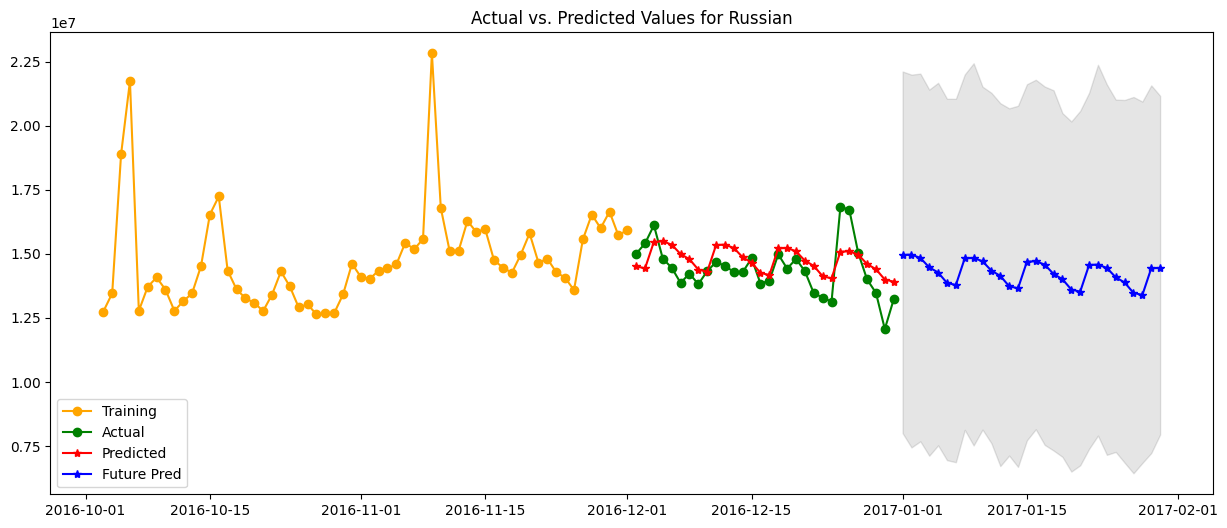

15:08:57 - cmdstanpy - INFO - Chain [1] start processing


************************************************** RU **************************************************



************************************************** DE **************************************************
Forecasting for DE...


15:08:58 - cmdstanpy - INFO - Chain [1] done processing


Performance for DE:
MAE : 1253507.612
RMSE : 1864050.865
MAPE: 0.068


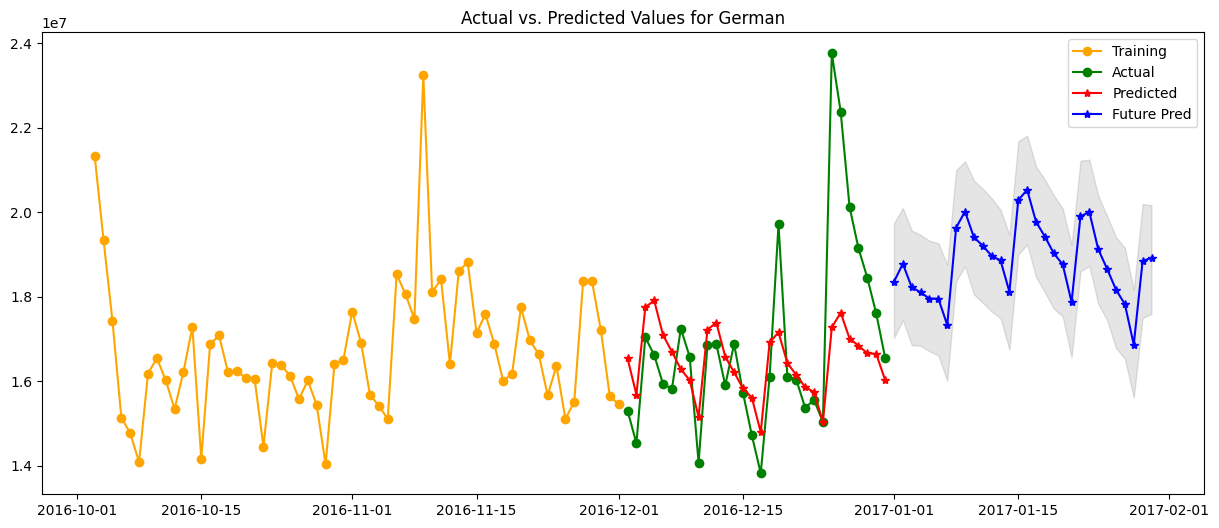

************************************************** DE **************************************************



************************************************** JA **************************************************
Forecasting for JA...


15:08:58 - cmdstanpy - INFO - Chain [1] start processing
15:08:59 - cmdstanpy - INFO - Chain [1] done processing


Performance for JA:
MAE : 1340179.469
RMSE : 1724722.937
MAPE: 0.08


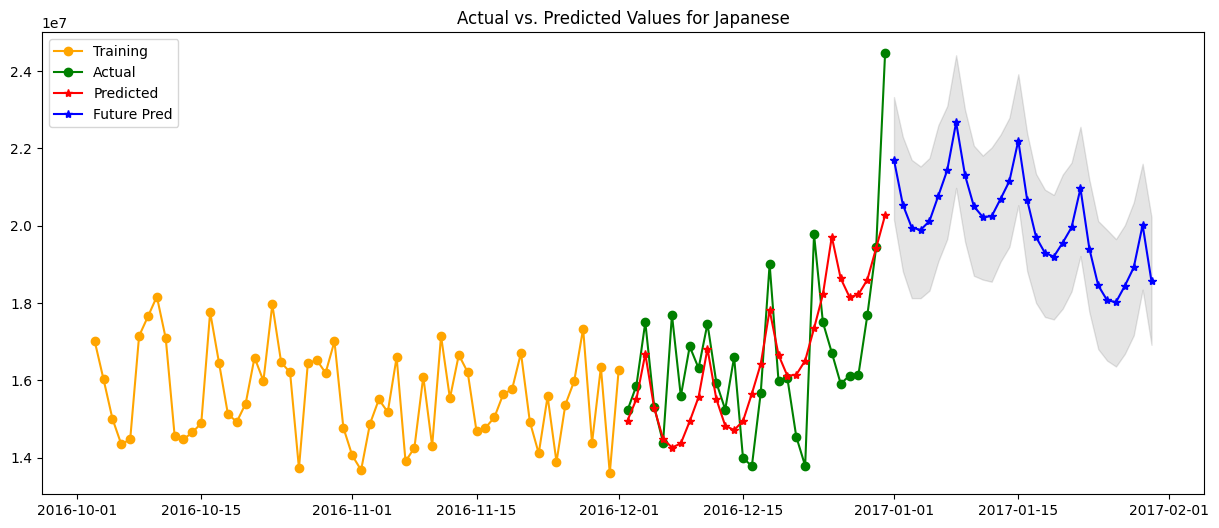

************************************************** JA **************************************************



************************************************** ES **************************************************
Forecasting for ES...


15:08:59 - cmdstanpy - INFO - Chain [1] start processing
15:08:59 - cmdstanpy - INFO - Chain [1] done processing


Performance for ES:
MAE : 1551037.646
RMSE : 1959009.507
MAPE: 0.11


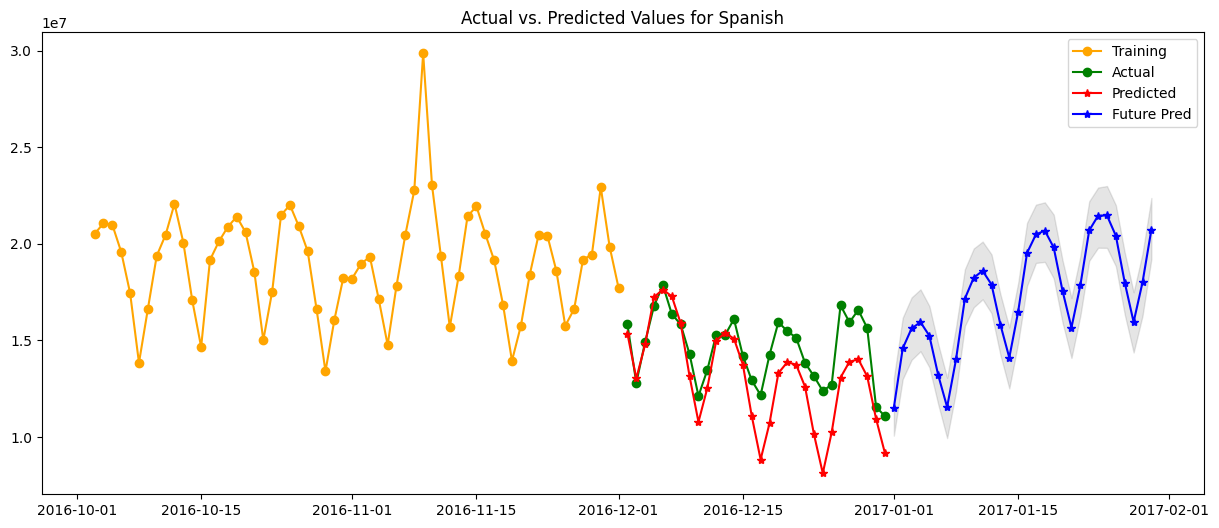

************************************************** ES **************************************************





In [63]:
forecast_df = forecast_pipeline(date_views_df, days_to_forecast=30)

In [64]:
forecast_df

,ds,yhat,yhat_lower,yhat_upper,Language
550,2017-01-01,7.268116e+06,6.641686e+06,7.889181e+06,ZH
551,2017-01-02,6.745295e+06,6.098049e+06,7.388785e+06,ZH
552,2017-01-03,6.547396e+06,5.902415e+06,7.232366e+06,ZH
553,2017-01-04,6.526421e+06,5.935316e+06,7.163889e+06,ZH
554,2017-01-05,6.419308e+06,5.763440e+06,7.089671e+06,ZH
...,...,...,...,...,...
575,2017-01-26,2.042219e+07,1.884725e+07,2.200515e+07,ES
576,2017-01-27,1.800063e+07,1.634525e+07,1.955320e+07,ES
577,2017-01-28,1.595430e+07,1.437772e+07,1.749687e+07,ES
578,2017-01-29,1.800505e+07,1.627398e+07,1.949654e+07,ES


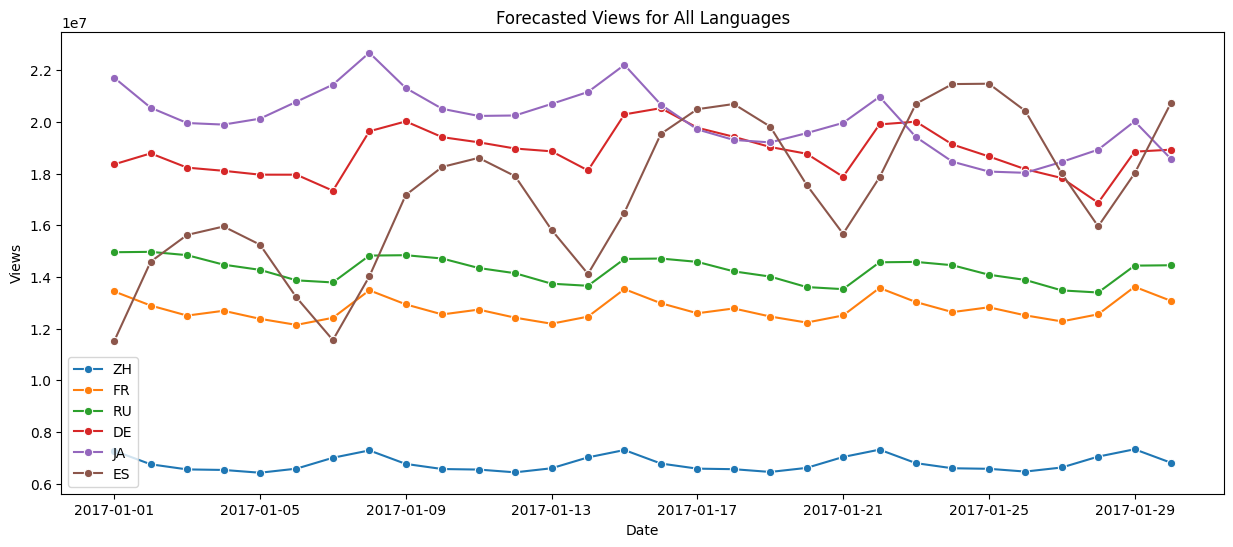

In [65]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=forecast_df, x='ds', y='yhat', hue='Language', marker='o')
plt.title('Forecasted Views for All Languages')
plt.xlabel('Date')
plt.ylabel('Views')
plt.legend()
plt.show()


#### Observations 🧐

##### Model Performance Comparsion: 

| Language | MAE          | RMSE          | MAPE  |
|----------|--------------|---------------|-------|
| ZH       | 407575.774   | 466456.482    | 0.066 |
| FR       | 862881.13    | 1200957.325   | 0.065 |
| RU       | 730035.637   | 857906.314    | 0.051 |
| DE       | 1253507.612  | 1864050.865   | 0.068 |
| JA       | 1340179.469  | 1724722.937   | 0.08  |
| ES       | 1551037.646  | 1959009.507   | 0.11  |

* Spanish (ES) has slightly higher MAPE, indicating the model hasn't fit very well with the data. There is a room for improvement.


- - -

#### Fine Tune ES Model

In [66]:
prop_df = date_views_df[['ES']].reset_index()
prop_df.columns = ['ds', 'y']
prop_df['ds'] = pd.to_datetime(prop_df['ds'])

train_df = prop_df[:-days_to_forecast]
test_df = prop_df[-days_to_forecast:]

# Initialize the model
# yearly_seasonality = True if lang in ['DE','JA', 'ES'] else False
# weekly_seasonality = True if lang not in ['ZH', 'FR', 'RU'] else False
m = Prophet(yearly_seasonality=True, weekly_seasonality=True)
m.fit(train_df)

future_dates = m.make_future_dataframe(periods=len(test_df))

forecast = m.predict(future_dates)
forecast_test = forecast[-len(test_df):]

y_true = test_df['y'].values
y_pred = forecast_test['yhat'].values

print(f'Performance for {"ES"}:')
performance(y_true, y_pred)

15:09:00 - cmdstanpy - INFO - Chain [1] start processing
15:09:00 - cmdstanpy - INFO - Chain [1] done processing


Performance for ES:
MAE : 1551037.646
RMSE : 1959009.507
MAPE: 0.11


In [67]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

best_mape = float("inf")
best_order = None
best_seasonal_order = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(train_x['ES'], order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit(disp=False)
            pred = results.forecast(steps=days_to_forecast)
            current_mape = mape(test_x['ES'], pred)
            # print(f'Order: {param} Seasonal Order: {param_seasonal} - MAPE: {current_mape}')
            if current_mape < best_mape:
                best_mape = current_mape
                best_order = param
                best_seasonal_order = param_seasonal
        except:
            continue

print(f'Best order: {best_order}')
print(f'Best seasonal_order: {best_seasonal_order}')
print(f'Best MAPE: {best_mape}')

Best order: (0, 2, 2)
Best seasonal_order: (2, 1, 2, 12)
Best MAPE: 0.08277353567242449


MAE : 1202152.52
RMSE : 1722478.842
MAPE: 0.083


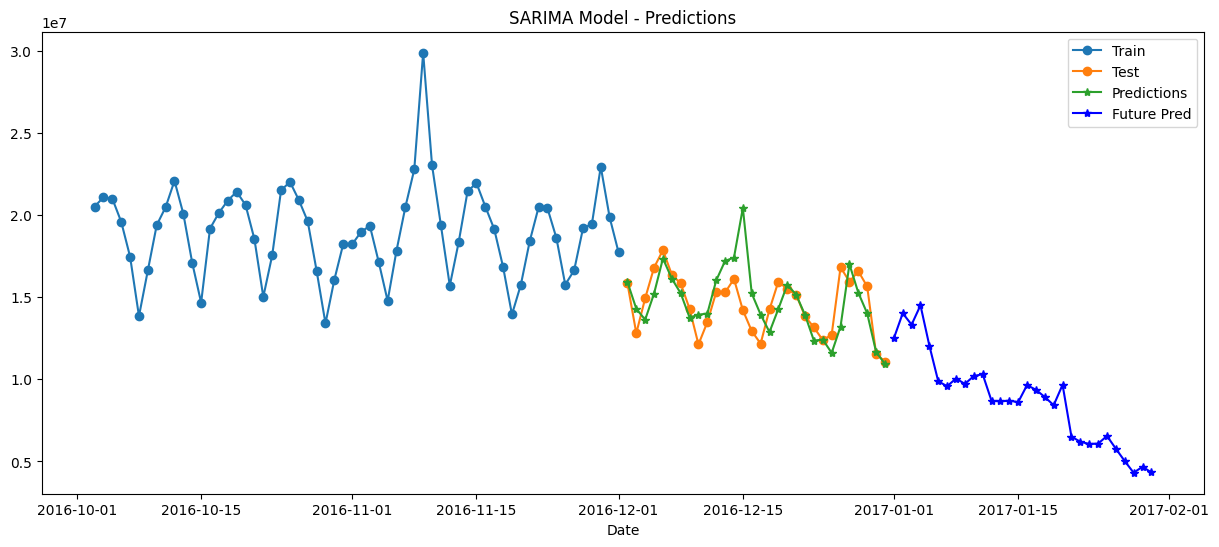

In [68]:
mod = SARIMAX(train_x['ES'], order=(0, 2, 2), seasonal_order=(2, 1, 2, 12), enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit(disp=False)
pred = results.forecast(steps=days_to_forecast)
performance(test_x['ES'], pred)

plt.figure(figsize=(15, 6))

plt.plot(train_x['ES'][-60:], label='Train', linestyle='-', marker='o')
plt.plot(test_x['ES'], label='Test', linestyle='-', marker='o')
plt.plot(pred, label='Predictions', linestyle='-', marker='*')

future_dates = results.forecast(steps=len(test_df)+30)
forecast_future = future_dates[-30:]

plt.plot(forecast_future.index, forecast_future.values, label='Future Pred', color='blue', marker='*')

plt.xlabel('Date')
plt.title('SARIMA Model - Predictions')
plt.legend()
plt.show()

#### Observations 🧐

##### Best Parameter for SARIMAX model:
* **Order**: (0, 2, 2) 
* **Seasonal Order**: (2, 1, 2, 12)

##### MAPE
* **MAPE**: 0.08277353567242449

SARIMAX Model better fits the ES (MAPE - 0.082) data compare to Prophet Model (MAPE - 0.11)

##### Model Performance: 

| Language | MAE          | RMSE          | MAPE  |
|----------|--------------|---------------|-------|
| EN (English)      | 6168372.58   | 8106833.47    | 0.048 |
| RU (Russian)      | 730035.637   | 857906.314    | 0.051 |
| FR (French)      | 862881.13    | 1200957.325   | 0.065 |
| ZH (Chinese)     | 407575.774   | 466456.482    | 0.066 |
| DE (German)      | 1253507.612  | 1864050.865   | 0.068 |
| JA (Japanese)     | 1340179.469  | 1724722.937   | 0.08  |
| ES (Spanish)     | 1202152.52   | 1722478.847   | 0.083 |

- - -

### Conclusion:
- The Prophet model was used to forecast the views for the Wikipedia pages in different languages.
- The model was trained on the historical data and used the exogenous variable to improve the predictions.
- The model was evaluated using the MAPE metric.
- The model was used to forecast the views for the next 30 days.
- The SARIMAX model was used to forecast the views for the Spanish Wikipedia page.

#### Recommendations 💡:
*  **Implement Advanced Forecasting Models**
    - *Adopt SARIMAX Models*: Given the superior performance of SARIMAX models in capturing both seasonal patterns and external influences, Adease should implement these models for more accurate and reliable forecasts.
    - *Continuous Model Evaluation*: Regularly evaluate and update the forecasting models to ensure they remain accurate and relevant as new data becomes available.

* **Leverage Exogenous Variables**
    - *Incorporate External Factors*: Identify and integrate key external variables (e.g., economic indicators, marketing campaigns, competitor activities) that can influence business metrics. This will enhance the predictive power of the models.

* **Enhance Data Quality and Management**
    - *Data Cleaning and Preprocessing*: Ensure that the data used for forecasting is clean, accurate, and up-to-date. Implement robust data preprocessing pipelines to handle missing values, outliers, and other data quality issues.

* **Regular Review and Adjustment**
    - *Periodic Review:* Conduct regular reviews of the forecasting models and their performance. Adjust the models as needed to account for any changes in the business environment or data patterns.

- - -